DAAA/FT/2A/01 P2214296 Ng Wee Herng CA1 Classification

##### **Background**
This dataset is collected from a bank, and contains various customer information. The bank wants to build a classification model to predict which customer will have default payment in the next month.

##### ***What is default payment?***
A payment default usually happens after multiple payments on a loan or other debt are missed. When someone defaults payment, the bank will start to charge interest on the remaining debt, and if the customer decides to continue defaulting the bank may consider legal action

Importing libraries

In [313]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_predict,
    StratifiedKFold,
)
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

import pickle

Importing Dataset

In [156]:
data = pd.read_csv('./credit_dataset.csv')
data

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1596,480000,female,univeresity,married,35,18214,11031,182123,0,182123,12960,0
1596,1597,150000,female,univeresity,married,37,1184,794,2756,0,2772,0,0
1597,1598,110000,female,post-graduate,single,29,107195,109443,106637,7845,4000,4000,0
1598,1599,240000,male,post-graduate,single,30,7744,7284,11234,7305,11263,10018,0


##### **Exploratory Data Analysis**

##### **Dataset Information**
The dataset is collected from a financial company and contains 1600 entries with 13 columns

**Customer ID**: Unique identifier for a customer ranging from 0 to 1599<br/>
**Credit Limit**: Maximum amount that the customer can spend on his/her credit card<br/>
**Gender**: Customer's Gender (male, female)<br/>
**Education**: Customer's Education Level (high school, university, post graduate)<br/>
**Marriage Status**: Customer's marriage status (single, married)<br/>
**Age**: Customer's age<br/>
**Bill_Amount1**: Customer's credit card bill amount 1 month ago<br/>
**Bill_Amount2**: Customer's credit card bill amount 2 months ago<br/>
**Bill_Amount3**: Customer's credit card bill amount 3 months ago<br/>
**Pay_Amount1**: Amount the customer paid 1 month ago<br/>
**Pay_Amount2**: Amount the customer paid 2 months ago<br/>
**Pay_Amount3**: Amount the customer paid 3 months ago<br/>
**Default payment next month**: Whether the customer will default next month <br/>
(1 = default, 0 = non default)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer ID                 1600 non-null   int64 
 1   Credit Limit                1600 non-null   int64 
 2   Gender                      1600 non-null   object
 3   Education                   1600 non-null   object
 4   Marriage Status             1600 non-null   object
 5   Age                         1600 non-null   int64 
 6   Bill_Amount1                1600 non-null   int64 
 7   Bill_Amount2                1600 non-null   int64 
 8   Bill_Amount3                1600 non-null   int64 
 9   Pay_Amount1                 1600 non-null   int64 
 10  Pay_Amount2                 1600 non-null   int64 
 11  Pay_Amount3                 1600 non-null   int64 
 12  Default payment next month  1600 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 162.6+ KB


- We can see that the dataset has 1600 entries with 13 columns
- The datatypes of all columns are int64 except for Gender, Education and Marriage Status

In [158]:
sns.set_style('darkgrid')
sns.set_palette('muted')

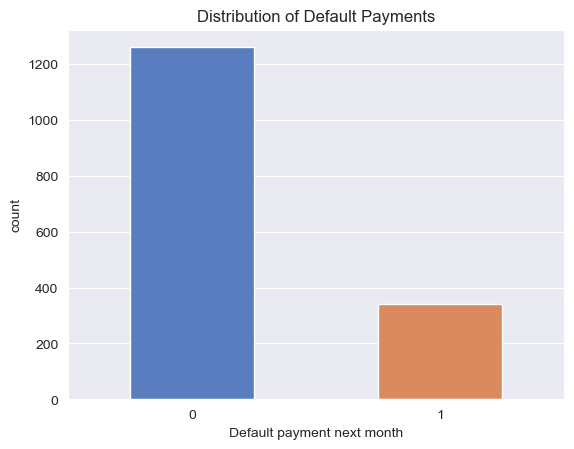

In [159]:
ax = sns.countplot(x='Default payment next month', data=data, width=0.5)

plt.title('Distribution of Default Payments')
plt.show()

We can see that the distribution is very imbalanced, with alot more customers not defaulting compared to defaulting customers

In [160]:
print(data.isna().sum())

Customer ID                   0
Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64


There are no missing values in the dataset

In [161]:
numerical_features = ['Credit Limit', 'Age', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3']
data[numerical_features].describe()

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,166787.500000,35.224375,49263.408125,47726.644375,44531.051875,5547.646250,5230.494375,4451.610625
std,129944.635707,9.404550,72687.106917,71476.217397,67164.064239,14085.471957,15569.605419,12491.715387
min,10000.000000,21.000000,-14386.000000,-13543.000000,-9850.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3138.000000,3288.250000,2321.500000,1000.000000,468.500000,226.500000
50%,140000.000000,34.000000,20320.500000,19769.500000,19332.500000,2176.500000,1904.000000,1313.500000
75%,230000.000000,41.000000,61602.750000,59891.750000,53857.250000,5021.000000,4592.500000,4000.000000
max,700000.000000,75.000000,507726.000000,509229.000000,499936.000000,239104.000000,285138.000000,222750.000000


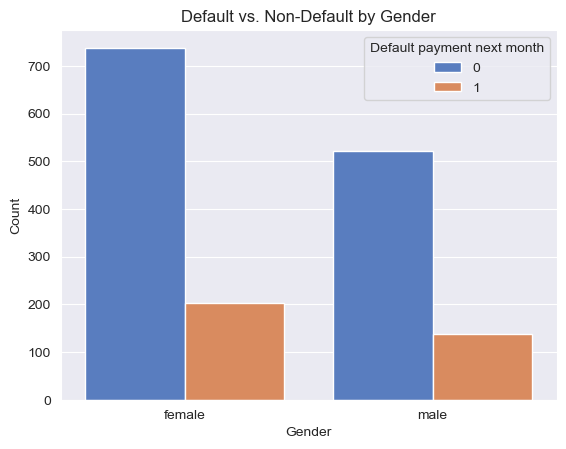

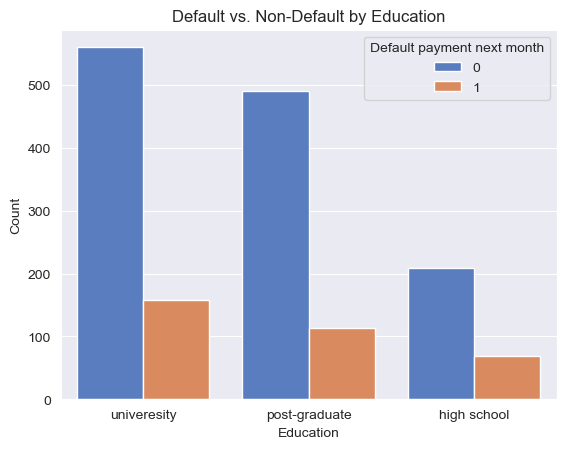

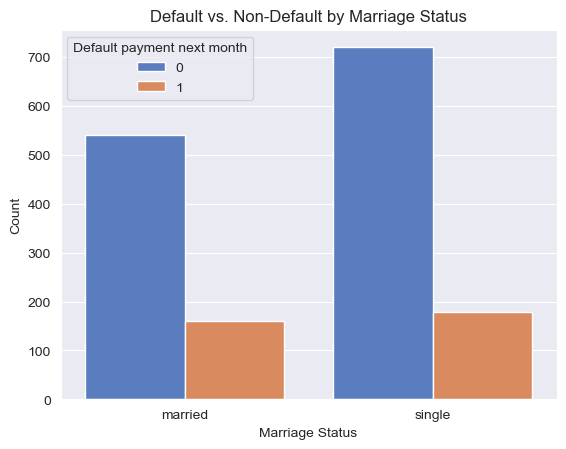

In [162]:
vars_plot = ['Gender', 'Education', 'Marriage Status']
for var in vars_plot:
    sns.countplot(x=var, hue='Default payment next month', data=data)
    plt.title(f'Default vs. Non-Default by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

**Gender**
- We can see that there are more females that default payment compared to males

**Education**
- We can see that the group of people who have defaulted the most payment are from the university education level, followed by post-graduates and then high school

**Marriage Status**
- We can see that there are more single people that default payment compared to married people

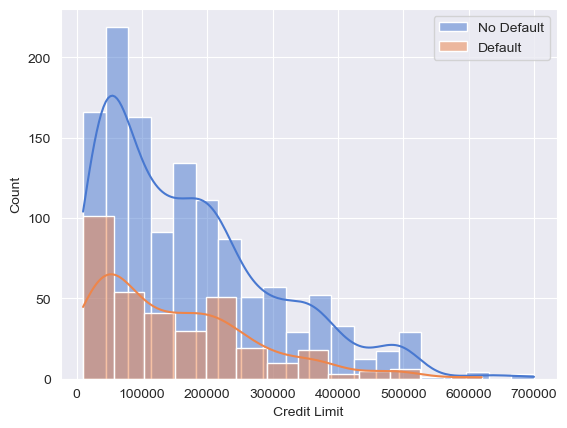

In [565]:
sns.histplot(x='Credit Limit', data=data[data['Default payment next month'] == 0], kde=True, label='No Default')
sns.histplot(x='Credit Limit', data=data[data['Default payment next month'] == 1], kde=True, label='Default')
plt.legend()
plt.show()

The distribution of credit limit is not very obvious and hard to distinguish between default and non default payment

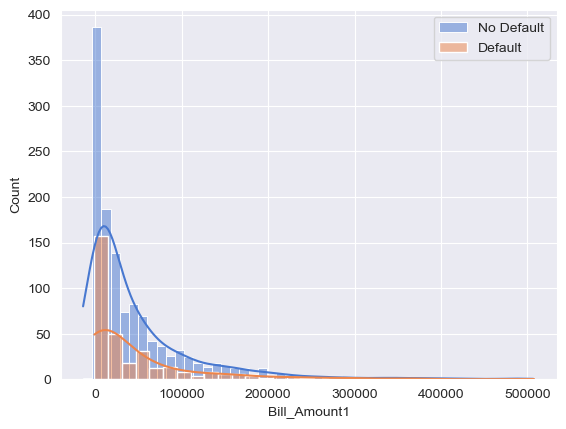

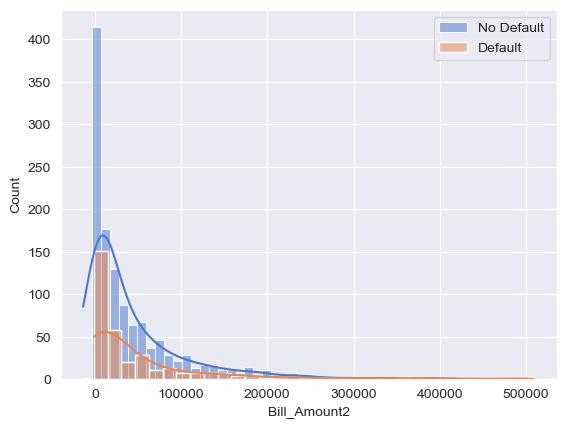

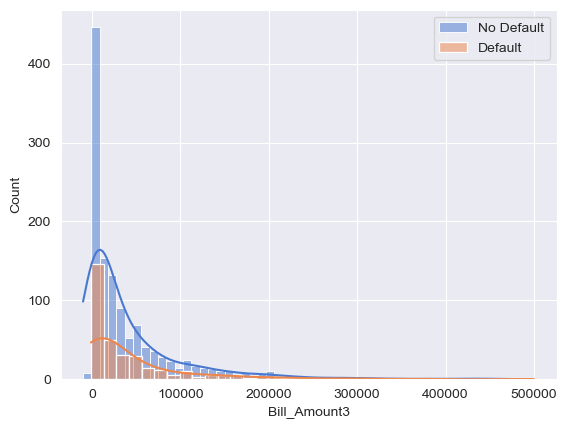

In [566]:
sns.histplot(x='Bill_Amount1', data=data[data['Default payment next month'] == 0], kde=True, label='No Default')
sns.histplot(x='Bill_Amount1', data=data[data['Default payment next month'] == 1], kde=True, label='Default')
plt.legend()
plt.show()

sns.histplot(x='Bill_Amount2', data=data[data['Default payment next month'] == 0], kde=True, label='No Default')
sns.histplot(x='Bill_Amount2', data=data[data['Default payment next month'] == 1], kde=True, label='Default')
plt.legend()
plt.show()

sns.histplot(x='Bill_Amount3', data=data[data['Default payment next month'] == 0], kde=True, label='No Default')
sns.histplot(x='Bill_Amount3', data=data[data['Default payment next month'] == 1], kde=True, label='Default')
plt.legend()
plt.show()

The distributions of bill amount are very similar, however we can see that people that default have slightly higher bill amounts compared to those who do not default

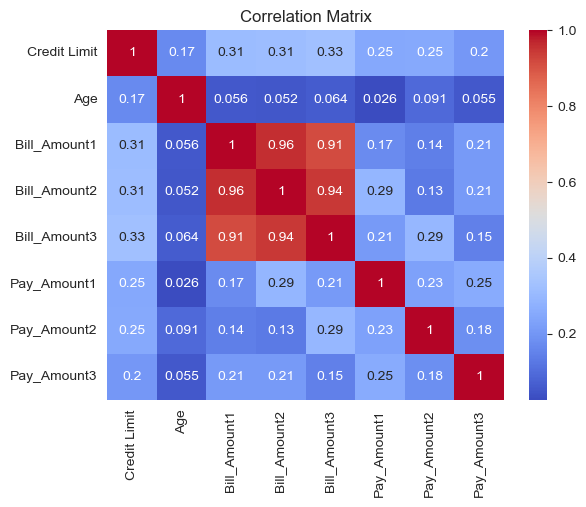

In [165]:
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- We can see that bill amounts are very positively related
- There is no clear relation between any other variables

#### **Feature Engineering**

**Looking at our features**

Customer ID is just an incremental number to identify each customer, and is not a feature that will be helpful in determining whether a customer will default payment next month

In [166]:
data = data.drop(['Customer ID'], axis=1)
data

,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
1,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
2,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
3,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
4,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,480000,female,univeresity,married,35,18214,11031,182123,0,182123,12960,0
1596,150000,female,univeresity,married,37,1184,794,2756,0,2772,0,0
1597,110000,female,post-graduate,single,29,107195,109443,106637,7845,4000,4000,0
1598,240000,male,post-graduate,single,30,7744,7284,11234,7305,11263,10018,0


We will split our dataset into two parts, one for the target variable y, and the rest are for features X

In [167]:
X, y = data.drop("Default payment next month", axis=1), data["Default payment next month"]

#### **Train-Test-Split**

We are using train test split to split our dataset into two parts, one for training the model and one for testing the model. We will be using the 80:20 ratio

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42
)
X_training = X_train.copy()

#### **Adding a few features**

1. Average Bill Amount<br>
- Since all the bill amounts are very positively correlated, we will compute the average of the bill amounts as a feature

2. Credit Bill Ratio
- This can help us to see the proportion of credit that the customer is using and can provide insights into the customer's credit habits

3. Payment Delay
- This can help us see how many months a customer has delayed payment

In [169]:
X_training['Average_Bill_Amount'] = X_training[['Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3']].mean(axis=1)

X_training['Credit_Bill_Ratio'] = X_training['Average_Bill_Amount'] / X_training['Credit Limit']

X_training['Payment_Delay'] = (X_training[['Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3']] == 0).sum(axis=1)

X_training

,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Average_Bill_Amount,Credit_Bill_Ratio,Payment_Delay
924,30000,female,univeresity,single,24,27391,28412,28575,1767,1700,1010,28126.000000,0.937533,0
423,200000,male,univeresity,married,38,104978,105924,102663,4500,0,3500,104521.666667,0.522608,1
611,360000,female,post-graduate,single,29,3280,0,0,0,0,0,1093.333333,0.003037,3
960,380000,male,post-graduate,single,43,8201,7882,-2,39,0,0,5360.333333,0.014106,2
985,130000,male,high school,single,43,1018,6377,-2,6433,2,937,2464.333333,0.018956,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,170000,male,post-graduate,married,39,74298,80073,81959,7000,3800,10000,78776.666667,0.463392,0
11,260000,female,post-graduate,single,51,12261,21670,9966,21818,9966,8583,14632.333333,0.056278,0
981,30000,male,univeresity,single,29,34423,33952,33165,0,0,0,33846.666667,1.128222,3
414,480000,female,high school,married,41,14867,26665,199960,26734,199982,9033,80497.333333,0.167703,0


As the model does not understand categorical values, we will have to change our categorical features to numerical form. There are a few ways to do this, but we will be using OrdinalEncoder and OneHotEncoder from sklearn.

Ordinal Encoding
- Used for ordinal data
- Will use on Education

One Hot Encoding
- Used for nominal data
- Will use on Gender and Marriage Status

Here, we specify the categories for the ordinal encoding (1 --> high school, 2 --> university, 3 --> post-graduate), and fit the data into the encoder to change it to numerical data

In [170]:
enc = OrdinalEncoder(categories=[[None, 'high school', 'univeresity', 'post-graduate']])
X_training[["Education"]] = enc.fit_transform(X_training[["Education"]])
X_training

,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Average_Bill_Amount,Credit_Bill_Ratio,Payment_Delay
924,30000,female,2.0,single,24,27391,28412,28575,1767,1700,1010,28126.000000,0.937533,0
423,200000,male,2.0,married,38,104978,105924,102663,4500,0,3500,104521.666667,0.522608,1
611,360000,female,3.0,single,29,3280,0,0,0,0,0,1093.333333,0.003037,3
960,380000,male,3.0,single,43,8201,7882,-2,39,0,0,5360.333333,0.014106,2
985,130000,male,1.0,single,43,1018,6377,-2,6433,2,937,2464.333333,0.018956,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,170000,male,3.0,married,39,74298,80073,81959,7000,3800,10000,78776.666667,0.463392,0
11,260000,female,3.0,single,51,12261,21670,9966,21818,9966,8583,14632.333333,0.056278,0
981,30000,male,2.0,single,29,34423,33952,33165,0,0,0,33846.666667,1.128222,3
414,480000,female,1.0,married,41,14867,26665,199960,26734,199982,9033,80497.333333,0.167703,0


In [171]:
data['Marriage Status'].unique()

array(['married', 'single'], dtype=object)

Here, we use one hot encoding for marriage status and gender, dropping the first column with the drop='if_binary' as there are only two categories for both of the features. Now we can see that all our features are if numerical format

Gender (0 --> female, 1 --> male)<br>
Marriage Status (0 --> married, 1 --> single)

In [172]:
enc = OneHotEncoder(drop = 'if_binary')
X_training[["Marriage Status", 'Gender']] = enc.fit_transform(X_training[["Marriage Status", "Gender"]]).toarray()
X_training

,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Average_Bill_Amount,Credit_Bill_Ratio,Payment_Delay
924,30000,0.0,2.0,1.0,24,27391,28412,28575,1767,1700,1010,28126.000000,0.937533,0
423,200000,1.0,2.0,0.0,38,104978,105924,102663,4500,0,3500,104521.666667,0.522608,1
611,360000,0.0,3.0,1.0,29,3280,0,0,0,0,0,1093.333333,0.003037,3
960,380000,1.0,3.0,1.0,43,8201,7882,-2,39,0,0,5360.333333,0.014106,2
985,130000,1.0,1.0,1.0,43,1018,6377,-2,6433,2,937,2464.333333,0.018956,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,170000,1.0,3.0,0.0,39,74298,80073,81959,7000,3800,10000,78776.666667,0.463392,0
11,260000,0.0,3.0,1.0,51,12261,21670,9966,21818,9966,8583,14632.333333,0.056278,0
981,30000,1.0,2.0,1.0,29,34423,33952,33165,0,0,0,33846.666667,1.128222,3
414,480000,0.0,1.0,0.0,41,14867,26665,199960,26734,199982,9033,80497.333333,0.167703,0


Before we fit our train data into a model, we have to scale our data. We will use StandardScaler from sklearn, which standardizes the data values into a standard format

In [173]:
num_col = [
    "Credit Limit",
    "Bill_Amount1",
    "Bill_Amount2",
    "Bill_Amount3",
    "Pay_Amount1",
    "Pay_Amount2",
    "Pay_Amount3",
    "Average_Bill_Amount",
    "Credit_Bill_Ratio"
]
scale = StandardScaler()

X_scale_train = X_training.copy()
X_scale_train[num_col] = scale.fit_transform(X_training[num_col])
X_scale_train

,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Average_Bill_Amount,Credit_Bill_Ratio,Payment_Delay
924,-1.076400,0.0,2.0,1.0,24,-0.313237,-0.283984,-0.245600,-0.287699,-0.221090,-0.278810,-0.287697,1.476199,0
423,0.238878,1.0,2.0,0.0,38,0.726452,0.773388,0.828622,-0.084673,-0.326419,-0.094344,0.790893,0.368777,1
611,1.476786,0.0,3.0,1.0,29,-0.636332,-0.671563,-0.659916,-0.418964,-0.326419,-0.353634,-0.669356,-1.017943,3
960,1.631524,1.0,3.0,1.0,43,-0.570389,-0.564042,-0.659945,-0.416067,-0.326419,-0.353634,-0.609113,-0.988400,2
985,-0.302707,1.0,1.0,1.0,43,-0.666643,-0.584572,-0.659945,0.058923,-0.326295,-0.284218,-0.650000,-0.975455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,0.006770,1.0,3.0,0.0,39,0.315331,0.420744,0.528429,0.101044,-0.090977,0.387196,0.427413,0.210730,0
11,0.703093,0.0,3.0,1.0,51,-0.515984,-0.375954,-0.515416,1.201826,0.291057,0.282220,-0.478206,-0.875844,0
981,-1.076400,1.0,2.0,1.0,29,-0.219006,-0.208411,-0.179048,-0.418964,-0.326419,-0.353634,-0.206929,1.985142,3
414,2.405217,0.0,1.0,0.0,41,-0.481063,-0.307815,2.239357,1.567020,12.064107,0.315558,0.451707,-0.578456,0


Handling Imbalanced Data with RandomOverSampler

We will use imblearn's RandomOverSampler to upsample our data to have a balanced test set

In [599]:
resample = RandomOverSampler(random_state=41)

X_resampled_train, y_resampled_train = resample.fit_resample(X_scale_train, y_train)
X_resampled_train

,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Average_Bill_Amount,Credit_Bill_Ratio,Payment_Delay
0,-1.076400,0.0,2.0,1.0,24,-0.313237,-0.283984,-0.245600,-0.287699,-0.221090,-0.278810,-0.287697,1.476199,0
1,0.238878,1.0,2.0,0.0,38,0.726452,0.773388,0.828622,-0.084673,-0.326419,-0.094344,0.790893,0.368777,1
2,1.476786,0.0,3.0,1.0,29,-0.636332,-0.671563,-0.659916,-0.418964,-0.326419,-0.353634,-0.669356,-1.017943,3
3,1.631524,1.0,3.0,1.0,43,-0.570389,-0.564042,-0.659945,-0.416067,-0.326419,-0.353634,-0.609113,-0.988400,2
4,-0.302707,1.0,1.0,1.0,43,-0.666643,-0.584572,-0.659945,0.058923,-0.326295,-0.284218,-0.650000,-0.975455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0.935201,0.0,3.0,0.0,30,-0.662704,-0.653666,-0.640908,-0.321054,-0.244820,-0.243028,-0.666274,-1.013977,0
2012,0.238878,0.0,1.0,0.0,49,0.022414,0.024694,0.155015,-0.418964,0.045331,-0.353634,0.066705,-0.315730,2
2013,-0.921661,0.0,2.0,0.0,31,-0.057010,-0.020650,0.060335,-0.272322,-0.053431,-0.275032,-0.007563,1.534436,0
2014,-0.921661,0.0,2.0,0.0,37,-0.654905,-0.627911,-0.610894,-0.307534,-0.301635,-0.338817,-0.644908,-0.875252,0


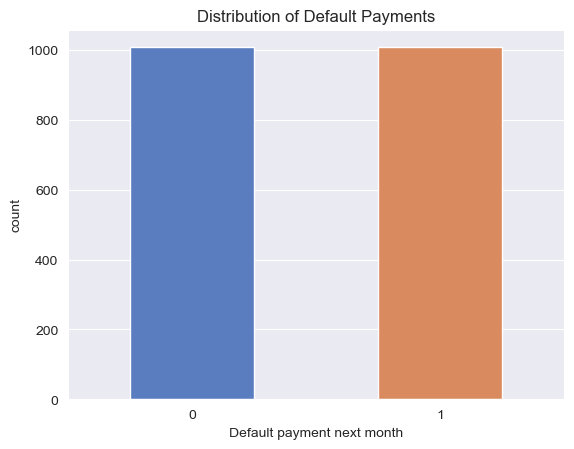

In [606]:
ax = sns.countplot(x=y_resampled_train, width=0.5)

plt.title('Distribution of Default Payments')
plt.show()

We will be using a pipeline for our data transformation as it prevents data leakage

In [174]:
def avgBill(data):
    data['Average_Bill_Amount'] = data[['Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3']].mean(axis=1)
    return data

def creditBill(data):
    data['Credit_Bill_Ratio'] = data['Average_Bill_Amount'] / data['Credit Limit']
    return data

def payDelay(data):
    data['Payment_Delay'] = (data[['Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3']] == 0).sum(axis=1)
    return data

preprocessor = ColumnTransformer(
    [
        ('ordinal', OrdinalEncoder(categories=[[None, 'high school', 'univeresity', 'post-graduate']]), ["Education"]),
        ('onehot', OneHotEncoder(drop = 'if_binary'), ["Gender", "Marriage Status"]),
    ],
    remainder="passthrough",
)

oversample = RandomOverSampler(random_state=42)

steps = [
    ('avgbill', FunctionTransformer(avgBill)),
    ('creditbill', FunctionTransformer(creditBill)),
    ('paydelay', FunctionTransformer(payDelay)),
    ("preprocessing", preprocessor),
    ('oversample', oversample),
    ("standardize", StandardScaler()),
    ("clf"),
]
step_num = len(steps) - 1

#### **Scoring Metrics**

Even though we resampled our train data, the test data is still imbalanced, which makes using accuracy not as good to use to evaluate our models

I decided to evaluate my models on the f1 metric and average precision.
- f1 is the harmonic mean of precision and recall
- average precision is a value that summarizes the precision recall curve

In [175]:
scoring_methods = ["precision", "recall", "f1_weighted", "f1", "roc_auc", "average_precision"]

In [176]:
steps[step_num] = ("model", DummyClassifier(strategy="uniform"))
dummy = Pipeline(steps=steps)
dummy.fit(X_train, y_train)
print(f"Baseline Accuracy Score :{dummy.score(X_test, y_test)}")
scores = cross_validate(
    dummy,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)
pd.DataFrame(scores)

Baseline Accuracy Score :0.50625


,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1_weighted,train_f1_weighted,test_f1,train_f1,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,0.009051,0.012017,0.203390,0.189286,0.444444,0.432653,0.560153,0.531871,0.279070,0.263354,0.5,0.5,0.210938,0.212674
1,0.007551,0.011517,0.166667,0.194577,0.407407,0.497959,0.495260,0.501556,0.236559,0.279817,0.5,0.5,0.210938,0.212674
2,0.008551,0.011017,0.184615,0.206093,0.444444,0.469388,0.516917,0.547683,0.260870,0.286426,0.5,0.5,0.210938,0.212674
3,0.007551,0.011017,0.217391,0.217822,0.555556,0.538776,0.529492,0.535229,0.312500,0.310223,0.5,0.5,0.210938,0.212674
4,0.007518,0.010519,0.186441,0.218803,0.407407,0.522449,0.545964,0.546324,0.255814,0.308434,0.5,0.5,0.210938,0.212674
5,0.008018,0.011019,0.227273,0.209343,0.555556,0.493878,0.552132,0.540992,0.322581,0.294046,0.5,0.5,0.210938,0.212674
6,0.007503,0.011018,0.229508,0.206835,0.518519,0.469388,0.574371,0.549283,0.318182,0.287141,0.5,0.5,0.210938,0.212674
7,0.007501,0.012532,0.200000,0.210702,0.481481,0.514286,0.531126,0.532414,0.282609,0.298932,0.5,0.5,0.210938,0.212674
8,0.006501,0.011018,0.111111,0.234811,0.214286,0.586066,0.498966,0.551211,0.146341,0.335287,0.5,0.5,0.218750,0.211806
9,0.007014,0.010802,0.183333,0.221658,0.392857,0.536885,0.529018,0.547209,0.250000,0.313772,0.5,0.5,0.218750,0.211806


Comparing our data to a dummy baseline, we can see that the area under the roc curve is 0.5, which means that the dummy classifier is randomly guessing whether a customer has defaulted or not

In [177]:
clfs = [('DecisionTreeClassifier', DecisionTreeClassifier()),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('AdaBoostClassifier', AdaBoostClassifier()),
        ('LogisticRegression', LogisticRegression()),
        ('KNeighborsClassifier', KNeighborsClassifier()),
        ('GradientBoostingClassifier', GradientBoostingClassifier()),
        ('GaussianNB', GaussianNB()),
        ('RidgeClassifier', RidgeClassifier()),
        ('RidgeClassifierCV', RidgeClassifierCV()),
        ('SGDClassifier', SGDClassifier()),
        ('SVC', SVC())]

In [562]:
def select_model(X_train, y_train, clfs, scoring):
    # placeholderw
    output = []
    # iterate through models
    for name, clf in clfs:
        # creating temporary pipeline
        steps[step_num] = (name, clf)
        temp_pipeline = Pipeline(steps=steps)
        # cross validate
        score = cross_validate(
            temp_pipeline,
            X_train,
            y_train,
            scoring=scoring,
            n_jobs=3,
            verbose=1,
            cv=10,
            return_train_score=True,
        )
        # get the average score and then store in a Series
        output.append(pd.Series(score, name=name).apply(np.mean))
    return pd.DataFrame(output).sort_values(
        by=[
            "test_f1_weighted",
            "test_f1",
            "test_average_precision",
            "test_recall",
        ],
        ascending=False,
    )

model_scores = select_model(X_train, y_train, clfs, scoring_methods)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   

In [563]:
model_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1_weighted,train_f1_weighted,test_f1,train_f1,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
RandomForestClassifier,0.269958,0.027342,0.337713,1.000000,0.179894,1.000000,0.719906,1.000000,0.233408,1.000000,0.603085,1.000000,0.301768,1.000000
GradientBoostingClassifier,0.355057,0.012068,0.338636,0.615474,0.429894,0.849247,0.713180,0.862767,0.378339,0.713556,0.636577,0.932117,0.353740,0.812381
AdaBoostClassifier,0.120025,0.022144,0.332246,0.424053,0.543783,0.703008,0.694424,0.753899,0.411906,0.528955,0.642910,0.803130,0.370162,0.559287
DecisionTreeClassifier,0.016146,0.011655,0.250121,1.000000,0.241931,1.000000,0.679613,1.000000,0.243401,1.000000,0.520758,1.000000,0.228081,1.000000
RidgeClassifier,0.011873,0.011945,0.300093,0.317021,0.573677,0.589441,0.656195,0.672810,0.392315,0.412128,0.639914,0.662590,0.342120,0.345524
RidgeClassifierCV,0.011866,0.014380,0.299353,0.315849,0.573677,0.589033,0.655541,0.671606,0.391719,0.411028,0.640570,0.662380,0.341939,0.344779
SVC,0.092567,0.036645,0.288457,0.377951,0.532407,0.705049,0.654152,0.716771,0.373268,0.491974,0.623527,0.775934,0.313314,0.451074
LogisticRegression,0.012194,0.011746,0.293332,0.319297,0.573545,0.610269,0.647753,0.671407,0.386150,0.419042,0.643951,0.667380,0.348079,0.351147
SGDClassifier,0.014984,0.013869,0.242626,0.263034,0.529630,0.557571,0.592268,0.609176,0.329581,0.355343,0.573166,0.601143,0.297276,0.293637
KNeighborsClassifier,0.009508,0.019809,0.218634,0.440190,0.437169,0.884801,0.585567,0.759802,0.290909,0.587887,0.509378,0.890844,0.223045,0.706298


We will be choosing the first three models to try to tune.<br>
Gradient Boosting and AdaBoost have the higher f1 and average precision score compared to the rest.<br>
RandomForest does have a lower f1 and average precision than other models, but it has the highest weighted f1, which means it can predict the majority class best

We do need to take note that the weighted f1 score is higher than the f1 score, which indicates that our models are having difficulty trying to predict the minority class in the dataset, which is the people who have defaulted

In [181]:
steps[step_num] = ("model", AdaBoostClassifier())

adb_clf = Pipeline(steps=steps)
adb_clf.fit(X_train, y_train)
print(f"Model Accuracy Score :{adb_clf.score(X_train, y_train)}")
scores = cross_validate(
    adb_clf,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)
# displaying scores
display(
    pd.DataFrame(scores)
    .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))
)

Model Accuracy Score :0.72734375


C:\Users\ngwee\AppData\Local\Temp\ipykernel_16864\1879278457.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))


,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1_weighted,train_f1_weighted,test_f1,train_f1,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,0.122037,0.022571,0.361702,0.433414,0.629630,0.730612,0.712559,0.759538,0.459459,0.544073,0.679318,0.804934,0.455262,0.550827
1,0.124071,0.022071,0.292683,0.412888,0.444444,0.706122,0.678837,0.745483,0.352941,0.521084,0.585442,0.799253,0.301430,0.553281
2,0.131583,0.025933,0.348837,0.434568,0.555556,0.718367,0.709773,0.760645,0.428571,0.541538,0.685185,0.802027,0.395586,0.555419
3,0.126072,0.025942,0.380952,0.417476,0.592593,0.702041,0.730764,0.749055,0.463768,0.523592,0.650165,0.802203,0.372702,0.558622
4,0.134905,0.025393,0.333333,0.412346,0.592593,0.681633,0.691606,0.746188,0.426667,0.513846,0.685552,0.796530,0.399589,0.558907
5,0.131909,0.023890,0.240000,0.436275,0.444444,0.726531,0.621176,0.761638,0.311688,0.545176,0.592043,0.810773,0.290707,0.594119
6,0.123891,0.027894,0.315789,0.418886,0.444444,0.706122,0.697567,0.749920,0.369231,0.525836,0.588376,0.802813,0.335718,0.552029
7,0.137373,0.026065,0.357143,0.433333,0.555556,0.689796,0.716211,0.760424,0.434783,0.532283,0.681335,0.801778,0.478320,0.551920
8,0.119956,0.021008,0.367347,0.418953,0.642857,0.688525,0.704577,0.751724,0.467532,0.520930,0.669643,0.803412,0.371281,0.564679
9,0.120957,0.023025,0.340909,0.422392,0.535714,0.680328,0.694067,0.754375,0.416667,0.521193,0.615714,0.807576,0.305293,0.553061


In [183]:
steps[step_num] = ("model", RandomForestClassifier())

rf_clf = Pipeline(steps=steps)
rf_clf.fit(X_train, y_train)
print(f"Model Accuracy Score :{rf_clf.score(X_train, y_train)}")
scores = cross_validate(
    rf_clf,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)
# displaying scores
display(
    pd.DataFrame(scores)
    .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))
)

Model Accuracy Score :1.0


C:\Users\ngwee\AppData\Local\Temp\ipykernel_16864\264451153.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))


,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1_weighted,train_f1_weighted,test_f1,train_f1,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,0.289318,0.028618,0.466667,1.0,0.259259,1.0,0.756133,1.0,0.333333,1.0,0.649982,1.0,0.382636,1.0
1,0.296332,0.034536,0.250000,1.0,0.148148,1.0,0.698649,1.0,0.186047,1.0,0.581041,1.0,0.265965,1.0
2,0.280799,0.032622,0.333333,1.0,0.148148,1.0,0.719609,1.0,0.205128,1.0,0.570957,1.0,0.287061,1.0
3,0.287303,0.030122,0.388889,1.0,0.259259,1.0,0.738759,1.0,0.311111,1.0,0.587092,1.0,0.286304,1.0
4,0.301011,0.033083,0.400000,1.0,0.148148,1.0,0.730183,1.0,0.216216,1.0,0.601944,1.0,0.293637,1.0
5,0.315028,0.028573,0.266667,1.0,0.148148,1.0,0.703876,1.0,0.190476,1.0,0.550605,1.0,0.305497,1.0
6,0.309526,0.036075,0.285714,1.0,0.148148,1.0,0.709109,1.0,0.195122,1.0,0.625779,1.0,0.300638,1.0
7,0.310524,0.032076,0.421053,1.0,0.296296,1.0,0.749709,1.0,0.347826,1.0,0.634580,1.0,0.369446,1.0
8,0.278024,0.036420,0.437500,1.0,0.250000,1.0,0.740298,1.0,0.318182,1.0,0.630179,1.0,0.301802,1.0
9,0.281677,0.030293,0.363636,1.0,0.142857,1.0,0.714515,1.0,0.205128,1.0,0.580179,1.0,0.316647,1.0


In [184]:
steps[step_num] = ("model", GradientBoostingClassifier())

gb_clf = Pipeline(steps=steps)
gb_clf.fit(X_train, y_train)
print(f"Model Accuracy Score :{gb_clf.score(X_train, y_train)}")
scores = cross_validate(
    gb_clf,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True,
)
# displaying scores
display(
    pd.DataFrame(scores)
    .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))
)

Model Accuracy Score :0.83046875


C:\Users\ngwee\AppData\Local\Temp\ipykernel_16864\2822032010.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(pd.Series(pd.DataFrame(scores).mean(), name="Mean"))


,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1_weighted,train_f1_weighted,test_f1,train_f1,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,0.406583,0.013808,0.384615,0.603989,0.555556,0.865306,0.735437,0.859339,0.454545,0.711409,0.641547,0.934057,0.385782,0.812567
1,0.402560,0.013329,0.290323,0.618234,0.333333,0.885714,0.695119,0.867517,0.310345,0.728188,0.588192,0.940310,0.332445,0.821308
2,0.403080,0.012310,0.257143,0.603499,0.333333,0.844898,0.671340,0.857232,0.290323,0.704082,0.633297,0.931395,0.309934,0.803011
3,0.408878,0.013535,0.343750,0.630094,0.407407,0.820408,0.719518,0.865610,0.372881,0.712766,0.637330,0.931632,0.333216,0.823185
4,0.385648,0.014524,0.361111,0.611594,0.481481,0.861224,0.724845,0.862271,0.412698,0.715254,0.653282,0.933938,0.372593,0.807795
5,0.389650,0.013022,0.281250,0.634441,0.333333,0.857143,0.689195,0.871323,0.305085,0.729167,0.563623,0.931679,0.286769,0.809924
6,0.401672,0.012947,0.333333,0.633431,0.407407,0.881633,0.713425,0.873534,0.366667,0.737201,0.582508,0.937736,0.295640,0.815604
7,0.400172,0.015448,0.441176,0.605422,0.555556,0.820408,0.767362,0.855716,0.491803,0.696707,0.709571,0.927838,0.430307,0.809549
8,0.367956,0.013522,0.342105,0.584071,0.464286,0.811475,0.702951,0.846419,0.393939,0.679245,0.672500,0.922104,0.381414,0.798521
9,0.362442,0.014035,0.393939,0.629969,0.464286,0.844262,0.734263,0.868705,0.426230,0.721541,0.686429,0.930479,0.394395,0.822350


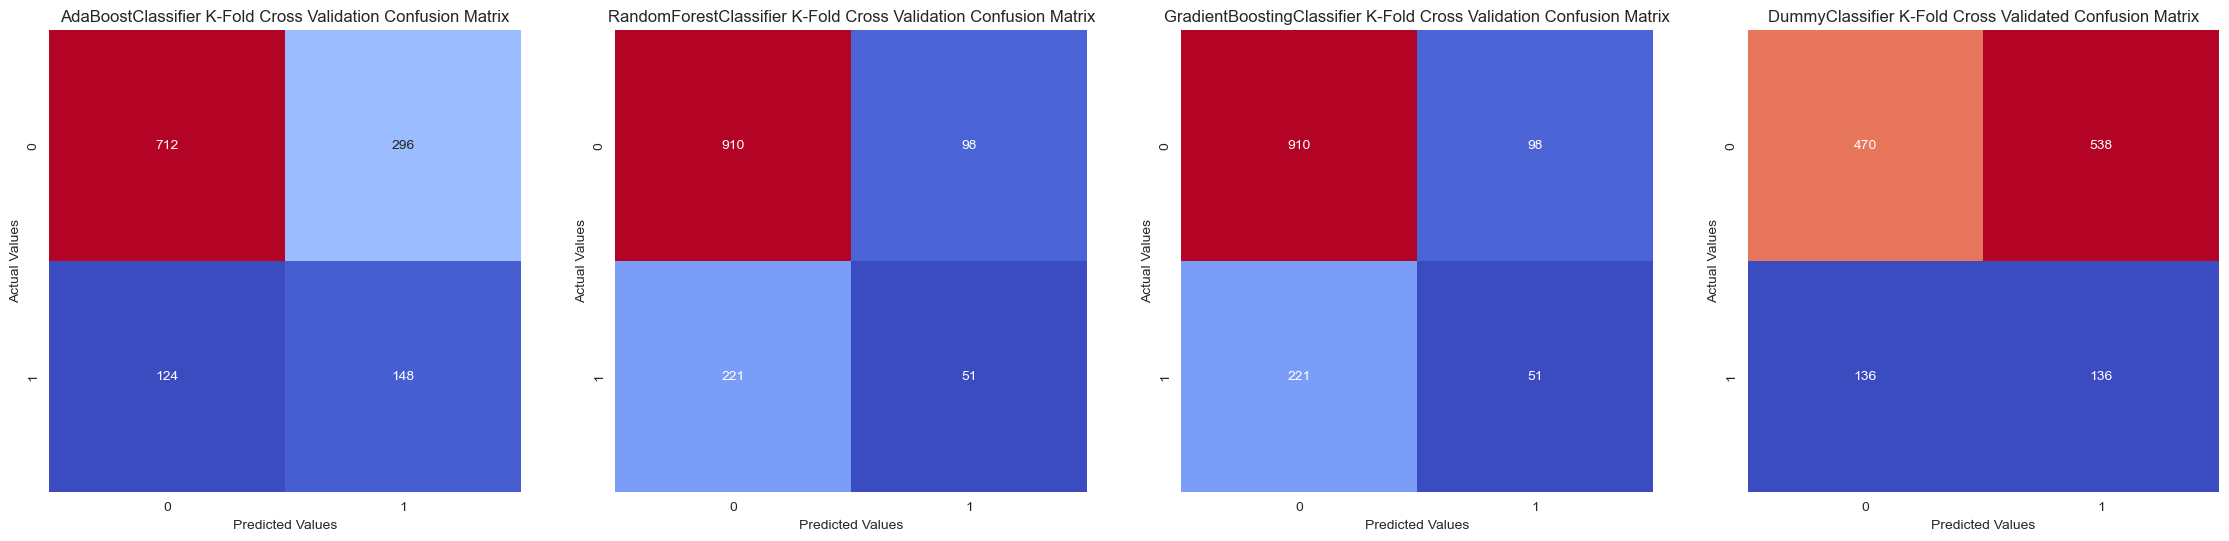

In [503]:
#Confusion Matrix
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 6))

# AdaBoostClassifier
adb_cm = confusion_matrix(
    y_train, cross_val_predict(adb_clf, X_train, y_train, cv=10)
)
sns.heatmap(adb_cm, annot=True, fmt="", ax=ax1, cbar=False, cmap="coolwarm")
ax1.set_title("AdaBoostClassifier K-Fold Cross Validation Confusion Matrix")
ax1.set_ylabel("Actual Values")
ax1.set_xlabel("Predicted Values")

# RandomForestClassifier
rf_cm = confusion_matrix(
    y_train, cross_val_predict(rf_clf, X_train, y_train, cv=10)
)
sns.heatmap(rf_cm, annot=True, fmt="", ax=ax2, cbar=False, cmap="coolwarm")
ax2.set_title("RandomForestClassifier K-Fold Cross Validation Confusion Matrix")
ax2.set_ylabel("Actual Values")
ax2.set_xlabel("Predicted Values")

# GradientBoostingClassifier
gb_cm = confusion_matrix(
    y_train, cross_val_predict(gb_clf, X_train, y_train, cv=10)
)
sns.heatmap(rf_cm, annot=True, fmt="", ax=ax3, cbar=False, cmap="coolwarm")
ax3.set_title("GradientBoostingClassifier K-Fold Cross Validation Confusion Matrix")
ax3.set_ylabel("Actual Values")
ax3.set_xlabel("Predicted Values")

# Dummy
dummy_cm = confusion_matrix(
    y_train, cross_val_predict(dummy, X_train, y_train, cv=10)
)
sns.heatmap(dummy_cm, annot=True, fmt="", ax=ax4, cbar=False, cmap="coolwarm")
ax4.set_title("DummyClassifier K-Fold Cross Validated Confusion Matrix")
ax4.set_ylabel("Actual Values")
ax4.set_xlabel("Predicted Values")

plt.show()

Using a confusion matrix to visualize the models we have chosen, we can see that:

- AdaBoost is the best at predicting the minority class as the True Negatives (FN) are the lowest, which means that AdaBoost can predict people who default payment better than the others. However, it is a bit less accurate at predicting people who did not default payment, as we can see that there are more False Positives (FP) than the other models
- Gradient Boosting and Random Forest are good at predicting the majority class (people who did not default), but struggle when predicting the minority class as seen from the much larger FN compared to adaboost
- In the context of defaulting payment, I feel that false negatives (FN) are more important to the bank as we do not want to misidentify a customer who defaulted as did not default
- I will try to improve minority class scores in the tuning stage

In [189]:
adb_y_pred = adb_clf.predict(X_test)
rf_y_pred = rf_clf.predict(X_test)
gb_y_pred = gb_clf.predict(X_test)

print(f"AdaBoostClassifier:\n{classification_report(y_test, adb_y_pred, digits=3)}")

AdaBoostClassifier:
              precision    recall  f1-score   support

           0      0.820     0.631     0.713       252
           1      0.262     0.485     0.340        68

    accuracy                          0.600       320
   macro avg      0.541     0.558     0.527       320
weighted avg      0.701     0.600     0.634       320



In [191]:
print(f"RandomForestClassifier:\n{classification_report(y_test, rf_y_pred, digits=3)}")

RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.800     0.889     0.842       252
           1      0.300     0.176     0.222        68

    accuracy                          0.738       320
   macro avg      0.550     0.533     0.532       320
weighted avg      0.694     0.738     0.710       320



In [192]:
print(f"GradientBoostingClassifier:\n{classification_report(y_test, gb_y_pred, digits=3)}")

GradientBoostingClassifier:
              precision    recall  f1-score   support

           0      0.826     0.698     0.757       252
           1      0.290     0.456     0.354        68

    accuracy                          0.647       320
   macro avg      0.558     0.577     0.556       320
weighted avg      0.712     0.647     0.671       320



The classification report further proves our claim that the minority class does not have good performance


#### **Hyperparameter Tuning**

For hyperparameter tuning, we will be using coarse to fine tuning.<br>

The steps for coarse to fine tuning are:
1. Random search
2. Find promising areas in the search space
3. Grid search in the smaller area
4. Continue until optimal score is obtained


#### **Hyperparameter Tuning for AdaBoost**

Getting parameters for the classifier

In [226]:
list(AdaBoostClassifier().get_params().keys())

['algorithm',
 'base_estimator',
 'estimator',
 'learning_rate',
 'n_estimators',
 'random_state']

Getting the default parameters of the classifier

In [274]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

Coarse Tuning with RandomizedSearchCV

In [300]:
parameters_coarse = {
    'n_estimators': np.arange(1, 200, 5),
    'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)]
}

# Creating a model based on the pipeline
steps[step_num] = (
    "hyper",
    RandomizedSearchCV(
        AdaBoostClassifier(),
        parameters_coarse,
        cv=10,
        n_iter=60,
        verbose=1,
        n_jobs=-1,
        scoring="f1"
    ),
)

adb_r_search = Pipeline(steps=steps)
# Fitting Model
adb_r_search.fit(X_train, y_train)

print(adb_r_search.named_steps["hyper"].best_estimator_)
print(adb_r_search.named_steps["hyper"].best_params_)
print(adb_r_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=91)
{'n_estimators': 91, 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=3), 'algorithm': 'SAMME.R'}
0.9163486297972347


In [357]:
{'n_estimators': 91, 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=3), 'algorithm': 'SAMME.R'}

{'n_estimators': 91,
 'learning_rate': 0.5,
 'estimator': DecisionTreeClassifier(max_depth=3),
 'algorithm': 'SAMME.R'}

With these values from the RandomizedSearchCV, we will now make a smaller range of values from these results and perform an exhaustive search to find the best parameters with GridSearchCV

Fine Tuning with GridSearchCV

In [301]:
n_est_grid = np.arange(adb_r_search.named_steps["hyper"].best_params_['n_estimators'] - 10, adb_r_search.named_steps["hyper"].best_params_['n_estimators'] + 10, 1)
lr_grid = np.arange(adb_r_search.named_steps["hyper"].best_params_['learning_rate'] - 0.25, adb_r_search.named_steps["hyper"].best_params_['learning_rate'] + 0.25, 0.01)

parameters_fine = {
    'n_estimators': n_est_grid,
    'learning_rate': lr_grid,
    'algorithm': [adb_r_search.named_steps["hyper"].best_params_['algorithm']],
    'estimator': [adb_r_search.named_steps["hyper"].best_params_['estimator']]
}

# Creating a model based on the pipeline
steps[step_num] = (
    "hyper",
    GridSearchCV(
        AdaBoostClassifier(),
        parameters_fine,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring="f1"
    ),
)

adb_grid_search = Pipeline(steps=steps)
# Fitting Model
adb_grid_search.fit(X_train, y_train)

print(adb_grid_search.named_steps["hyper"].best_estimator_)
print(adb_grid_search.named_steps["hyper"].best_params_)
print(adb_grid_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5900000000000003, n_estimators=99)
{'algorithm': 'SAMME.R', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.5900000000000003, 'n_estimators': 99}
0.9259469800013317


In [306]:
{'algorithm': 'SAMME.R', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.5900000000000003, 'n_estimators': 99}

{'algorithm': 'SAMME.R',
 'estimator': DecisionTreeClassifier(max_depth=3),
 'learning_rate': 0.5900000000000003,
 'n_estimators': 99}

Do note that the same parameters might not appear the same if it was run again as we did not set a random state. Thus, we are using the parameters listed above

Fitting the model with the tuned hyperparameters

In [302]:
steps[step_num] = (
    "model",
    adb_r_search.named_steps["hyper"].best_estimator_,
)

tuned_adb_clf = Pipeline(steps=steps)
# Fitting Model
tuned_adb_clf.fit(X_train, y_train)
# Creating predictions
tuned_adb_y_pred = tuned_adb_clf.predict(X_test)

Comparing scores with tuned vs untuned

In [312]:
print(f"AdaBoostClassifier:\n{classification_report(y_test, adb_y_pred, digits=3)}")
print(f"Tuned AdaBoostClassifier:\n{classification_report(y_test, tuned_adb_y_pred, digits=3)}")

AdaBoostClassifier:
              precision    recall  f1-score   support

           0      0.820     0.631     0.713       252
           1      0.262     0.485     0.340        68

    accuracy                          0.600       320
   macro avg      0.541     0.558     0.527       320
weighted avg      0.701     0.600     0.634       320

Tuned AdaBoostClassifier:
              precision    recall  f1-score   support

           0      0.823     0.849     0.836       252
           1      0.367     0.324     0.344        68

    accuracy                          0.738       320
   macro avg      0.595     0.586     0.590       320
weighted avg      0.726     0.738     0.731       320



In [304]:
print(f"AdaBoostClassifier\nf1_score: {metrics.f1_score(y_test, adb_y_pred)}\ntuned_f1_score: {metrics.f1_score(y_test, tuned_adb_y_pred)}\naverage_precision: {metrics.average_precision_score(y_test, adb_y_pred)}\ntuned_average_precision: {metrics.average_precision_score(y_test, tuned_adb_y_pred)}")

AdaBoostClassifier
f1_score: 0.34020618556701027
tuned_f1_score: 0.34375
average_precision: 0.23647584033613445
tuned_average_precision: 0.26237745098039217


We can see that from the hyperparameter tuning, the scores have improved a bit

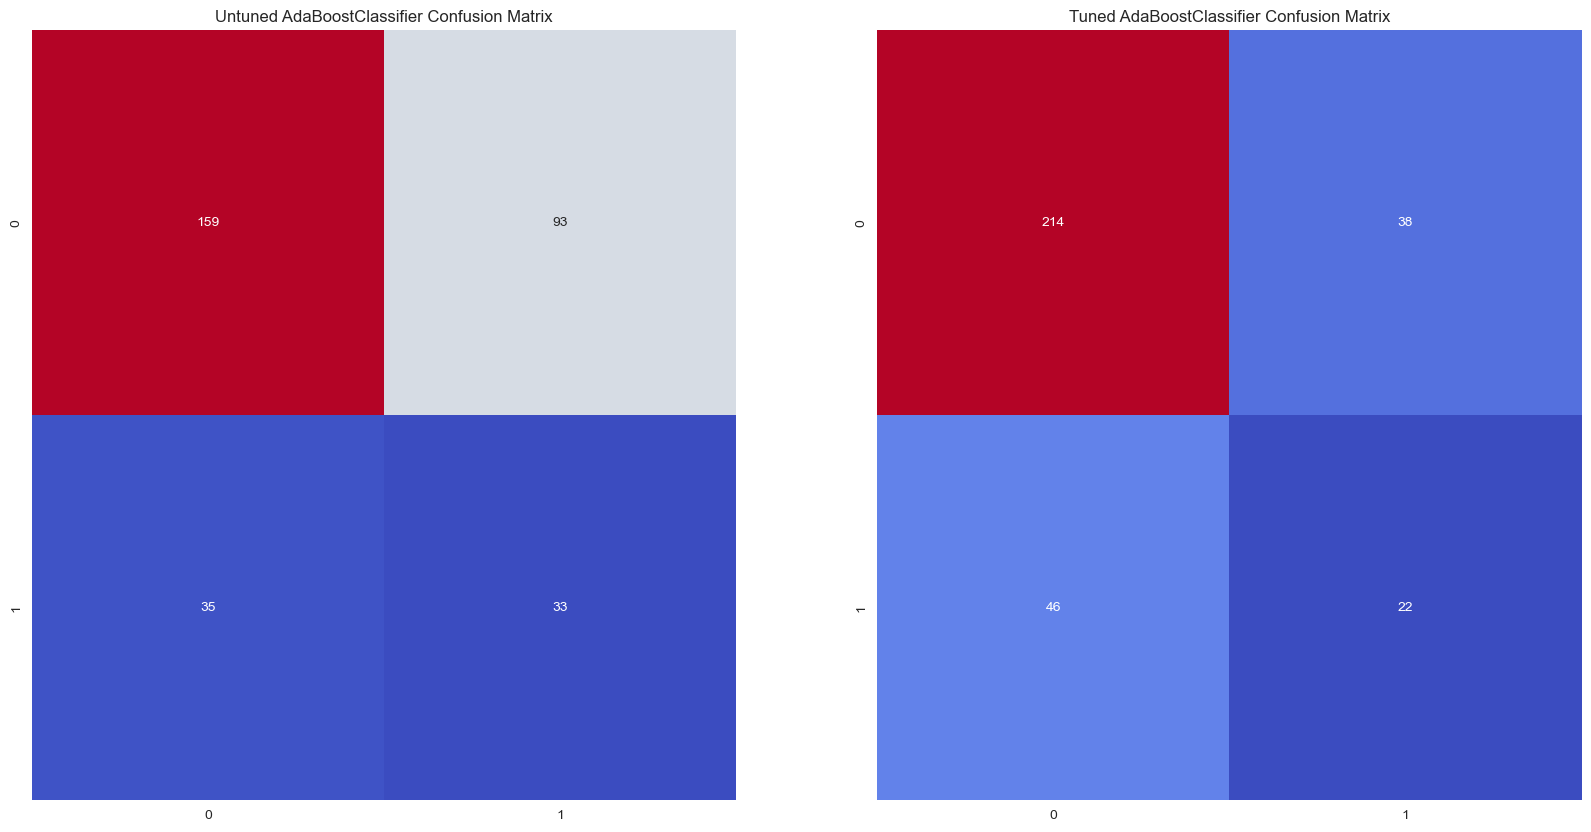

<Figure size 1000x1000 with 0 Axes>

In [309]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# Confusion Matrix
adb_cm = confusion_matrix(y_test, adb_y_pred)
adb_tuned_cm = confusion_matrix(y_test, tuned_adb_y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(adb_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax1)
ax1.set_title("Untuned AdaBoostClassifier Confusion Matrix")
sns.heatmap(adb_tuned_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax2)
ax2.set_title("Tuned AdaBoostClassifier Confusion Matrix")
plt.show()

We can see that the model has improved alot in terms of the majority class, however the minority class is still a problem. We can try to improve this by performing threshold tuning.

##### **What is Threshold Tuning?**

Threshold tuning is a common technique to determine an optimal threshold for imbalanced classification.

- By default, the threshold is 0.5 (if the probability is above 0.5, it will be considered 1, else 0)
- However, in imbalanced classification, the optimal threshold might not be at 0.5.
- We can use a precision-recall curve to try to find the optimal threshold for the model

#### **How to perform threshold tuning?**

1. Get probabilities from the class labels
2. Find the precision, recall and thresholds from the precision recall curve
3. Find the index of the best f1 score
4. Find the optimal threshold based off the index with the best f1 score
5. Fit the model with the new threshold 

Best Threshold: 0.4735 with f1: 0.4205
Recall: 0.6029, Precision: 0.3228


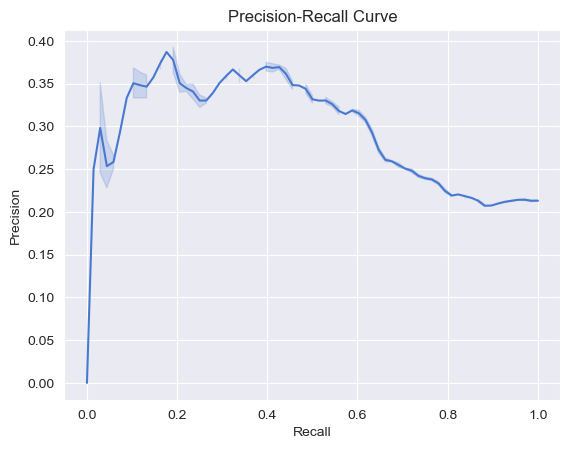

In [345]:
predicted_probabilities = tuned_adb_clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, predicted_probabilities)
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})

f1score = (2 * precision * recall) / (precision + recall + 1e-9)
index = np.argmax(f1score)

opt_threshold = round(thresholds[index], ndigits=4)
opt_f1 = round(f1score[index], ndigits=4)
opt_recall = round(recall[index], ndigits=4)
opt_precision = round(precision[index], ndigits=4)

print(f'Best Threshold: {opt_threshold} with f1: {opt_f1}')
print(f'Recall: {opt_recall}, Precision: {opt_precision}')

sns.lineplot(x='Recall', y='Precision', data=df_recall_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

With the tuned threshold found, we fit it back in to our probabilities to get the new classes

In [501]:
final_tuned_adb_clf = (predicted_probabilities > opt_threshold).astype(int)
print(f"Tuned AdaBoostClassifier:\n{classification_report(y_test, tuned_adb_y_pred, digits=3)}")
print(f"Tuned AdaBoostClassifier with Tuned Threshold:\n{classification_report(y_test, final_tuned_adb_clf, digits=3)}")

Tuned AdaBoostClassifier:
              precision    recall  f1-score   support

           0      0.823     0.849     0.836       252
           1      0.367     0.324     0.344        68

    accuracy                          0.738       320
   macro avg      0.595     0.586     0.590       320
weighted avg      0.726     0.738     0.731       320

Tuned AdaBoostClassifier with Tuned Threshold:
              precision    recall  f1-score   support

           0      0.866     0.563     0.683       252
           1      0.295     0.676     0.411        68

    accuracy                          0.588       320
   macro avg      0.580     0.620     0.547       320
weighted avg      0.745     0.588     0.625       320



In [502]:
print(f"AdaBoostClassifier\ntuned_f1_score: {metrics.f1_score(y_test, tuned_adb_y_pred)}\ntuned_f1_score (with threshold): {metrics.f1_score(y_test, final_tuned_adb_clf)}\ntuned_average_precision: {metrics.average_precision_score(y_test, tuned_adb_y_pred)}\ntuned_average_precision (with tuned threshold): {metrics.average_precision_score(y_test, final_tuned_adb_clf)}")

AdaBoostClassifier
tuned_f1_score: 0.34375
tuned_f1_score (with threshold): 0.4107142857142857
tuned_average_precision: 0.26237745098039217
tuned_average_precision (with tuned threshold): 0.26822209653092005


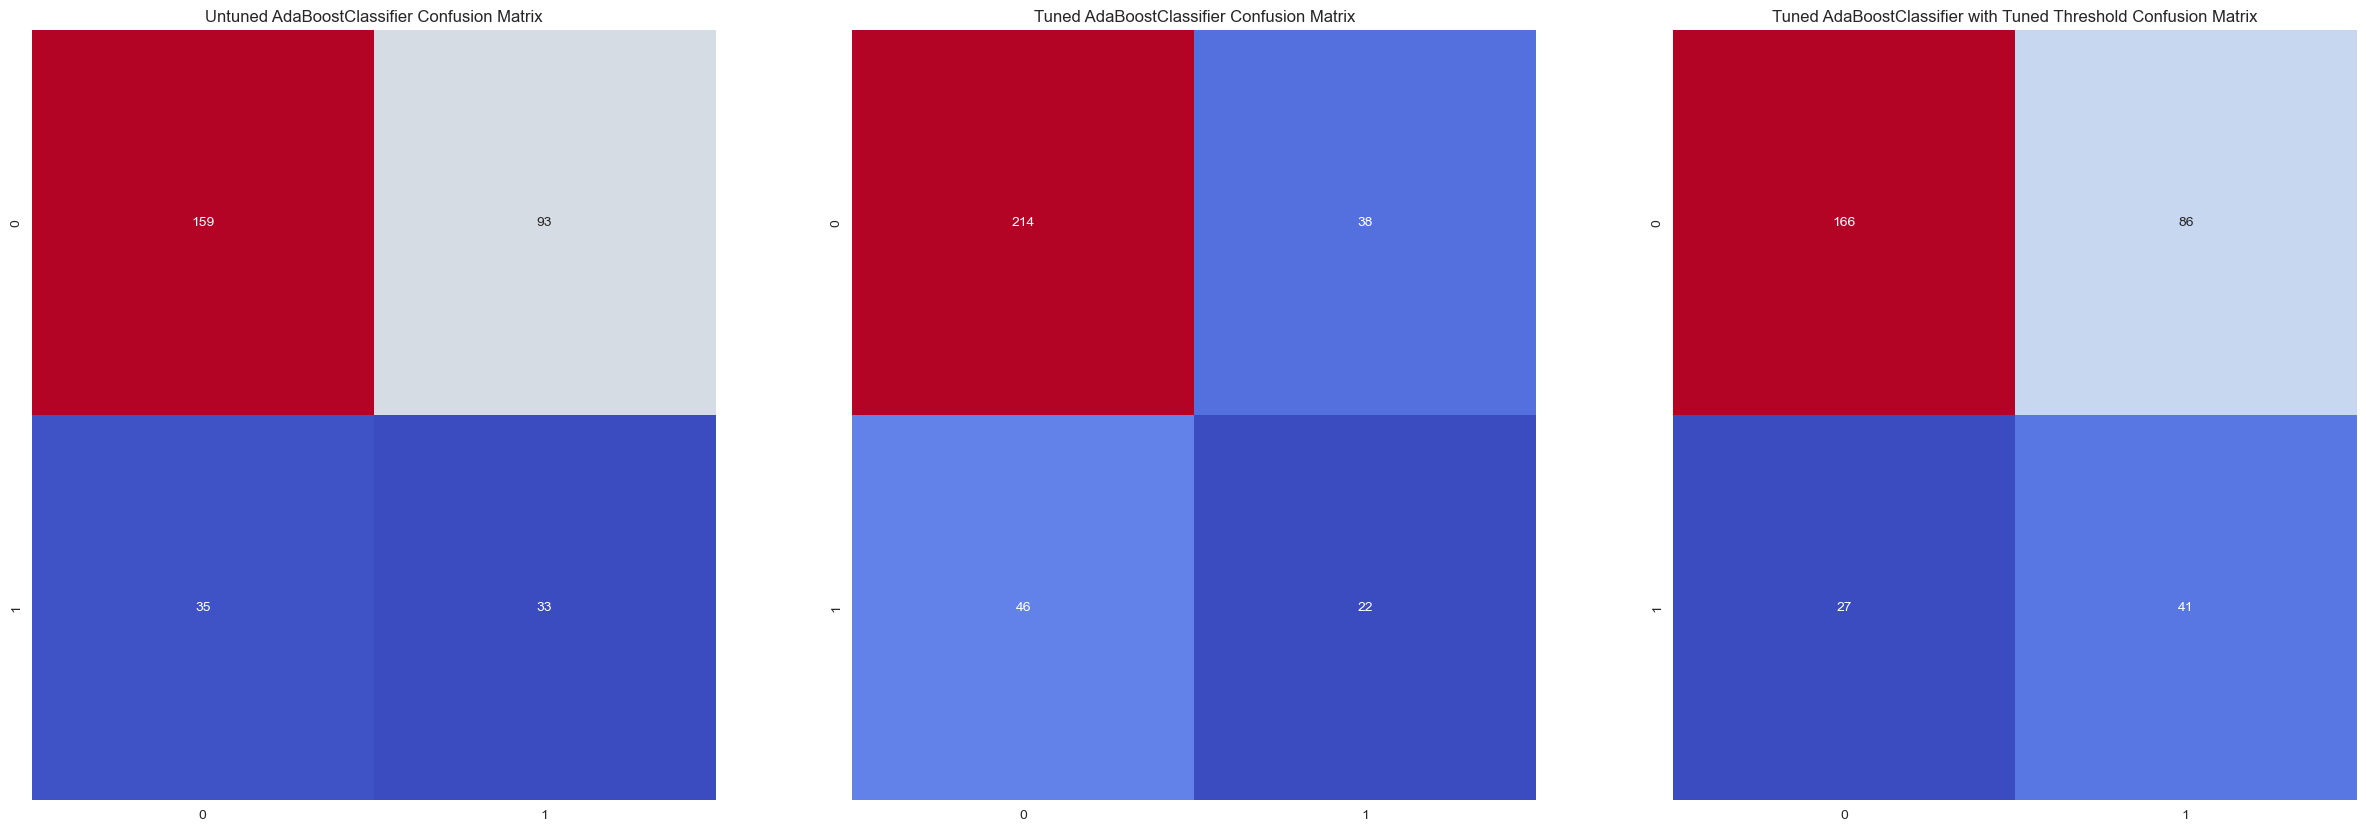

<Figure size 1000x1000 with 0 Axes>

In [360]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
# Confusion Matrix
adb_cm = confusion_matrix(y_test, adb_y_pred)
adb_tuned_cm = confusion_matrix(y_test, tuned_adb_y_pred)
adb_tuned_th_cm = confusion_matrix(y_test, final_tuned_adb_clf)
plt.figure(figsize=(10, 10))
sns.heatmap(adb_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax1)
ax1.set_title("Untuned AdaBoostClassifier Confusion Matrix")
sns.heatmap(adb_tuned_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax2)
ax2.set_title("Tuned AdaBoostClassifier Confusion Matrix")
sns.heatmap(adb_tuned_th_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax3)
ax3.set_title("Tuned AdaBoostClassifier with Tuned Threshold Confusion Matrix")
plt.show()

- We can see that the performance towards the minority class has increased, with the FN at 27, which is the lowest compared to untuned and tuned without tuned threshold.
- The tuned AdaBoostClassifier with Tuned Threshold does have more FP than just the Tuned AdaBoostClassifier, however this is expected as we shifted the focus towards improving the performance of the minority class

#### **Hyperparameter Tuning for RandomForest**

In [214]:
list(RandomForestClassifier().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [362]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Coarse Tuning with RandomizedSearchCV

In [481]:
parameters_coarse = {
    'n_estimators': np.arange(1, 201, 25),
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth': np.arange(1, 20, 5),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False],
    'min_weight_fraction_leaf': [0.0, 0.05, 0.1],
    'ccp_alpha': [0.0, 0.05, 0.1]
}

# Creating a model based on the pipeline
steps[step_num] = (
    "hyper",
    RandomizedSearchCV(
        RandomForestClassifier(),
        parameters_coarse,
        cv=10,
        n_iter=60,
        verbose=1,
        n_jobs=-1,
        scoring="f1"
    ),
)

rf_r_search = Pipeline(steps=steps)
# Fitting Model
rf_r_search.fit(X_train, y_train)

print(rf_r_search.named_steps["hyper"].best_estimator_)
print(rf_r_search.named_steps["hyper"].best_params_)
print(rf_r_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=16,
                       max_features='log2', n_estimators=126)
{'n_estimators': 126, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 16, 'criterion': 'log_loss', 'ccp_alpha': 0.0, 'bootstrap': False}
0.9436005567664859


In [1]:
{'n_estimators': 126, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 16, 'criterion': 'log_loss', 'ccp_alpha': 0.0, 'bootstrap': False}

{'n_estimators': 126,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 16,
 'criterion': 'log_loss',
 'ccp_alpha': 0.0,
 'bootstrap': False}

Fine Tuning with GridSearchCV

In [482]:
n_est_grid = np.arange(rf_r_search.named_steps["hyper"].best_params_['n_estimators'] - 10, rf_r_search.named_steps["hyper"].best_params_['n_estimators'] + 10, 1)
m_depth_grid = np.arange(rf_r_search.named_steps["hyper"].best_params_['max_depth'] - 3, rf_r_search.named_steps["hyper"].best_params_['max_depth'] + 3, 1)
mwf_leaf_grid = np.arange(rf_r_search.named_steps["hyper"].best_params_['min_weight_fraction_leaf'], rf_r_search.named_steps["hyper"].best_params_['min_weight_fraction_leaf'] + 0.01, 0.003)
ccpa_grid = np.arange(rf_r_search.named_steps["hyper"].best_params_['ccp_alpha'], rf_r_search.named_steps["hyper"].best_params_['ccp_alpha'] + 0.01, 0.003)

parameters_fine = {
    'n_estimators': n_est_grid,
    'criterion': [rf_r_search.named_steps["hyper"].best_params_['criterion']], 
    'max_depth': m_depth_grid,
    'max_features': [rf_r_search.named_steps["hyper"].best_params_['max_features']],
    'min_samples_split': [2],
    'min_samples_leaf': [1], 
    'bootstrap': [rf_r_search.named_steps["hyper"].best_params_['bootstrap']],
    'min_weight_fraction_leaf': mwf_leaf_grid,
    'ccp_alpha': ccpa_grid
}

# Creating a model based on the pipeline
steps[step_num] = (
    "hyper",
    GridSearchCV(
        RandomForestClassifier(),
        parameters_fine,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring="f1"
    ),
)

rf_grid_search = Pipeline(steps=steps)
# Fitting Model
rf_grid_search.fit(X_train, y_train)

print(rf_grid_search.named_steps["hyper"].best_estimator_)
print(rf_grid_search.named_steps["hyper"].best_params_)
print(rf_grid_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 1920 candidates, totalling 19200 fits
RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=17,
                       max_features='log2', n_estimators=123)
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'log_loss', 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 123}
0.9521932555218579


In [2]:
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'log_loss', 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 123}

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'log_loss',
 'max_depth': 17,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 123}

Fitting model with tuned hyperparameters

In [487]:
steps[step_num] = (
    "model",
    RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, criterion='log_loss', max_depth=18, max_features='log2', min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=78, class_weight='balanced')
)

tuned_rf_clf = Pipeline(steps=steps)
# Fitting Model
tuned_rf_clf.fit(X_train, y_train)
# Creating predictions
tuned_rf_y_pred = tuned_rf_clf.predict(X_test)

Comparing scores with tuned vs untuned

In [488]:
print(f"RandomForestClassifier:\n{classification_report(y_test, rf_y_pred, digits=3)}")
print(f"Tuned RandomForestClassifier:\n{classification_report(y_test, tuned_rf_y_pred, digits=3)}")

RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.800     0.889     0.842       252
           1      0.300     0.176     0.222        68

    accuracy                          0.738       320
   macro avg      0.550     0.533     0.532       320
weighted avg      0.694     0.738     0.710       320

Tuned RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.808     0.901     0.852       252
           1      0.359     0.206     0.262        68

    accuracy                          0.753       320
   macro avg      0.583     0.553     0.557       320
weighted avg      0.712     0.753     0.726       320



In [504]:
print(f"RandomForestClassifier\nf1_score: {metrics.f1_score(y_test, rf_y_pred)}\ntuned_f1_score: {metrics.f1_score(y_test, tuned_rf_y_pred)}\naverage_precision: {metrics.average_precision_score(y_test, rf_y_pred)}\ntuned_average_precision: {metrics.average_precision_score(y_test, tuned_rf_y_pred)}")

RandomForestClassifier
f1_score: 0.22222222222222224
tuned_f1_score: 0.26168224299065423
average_precision: 0.22794117647058823
tuned_average_precision: 0.24265648567119158


We can see that the scores have increased a little after hyperparameter tuning

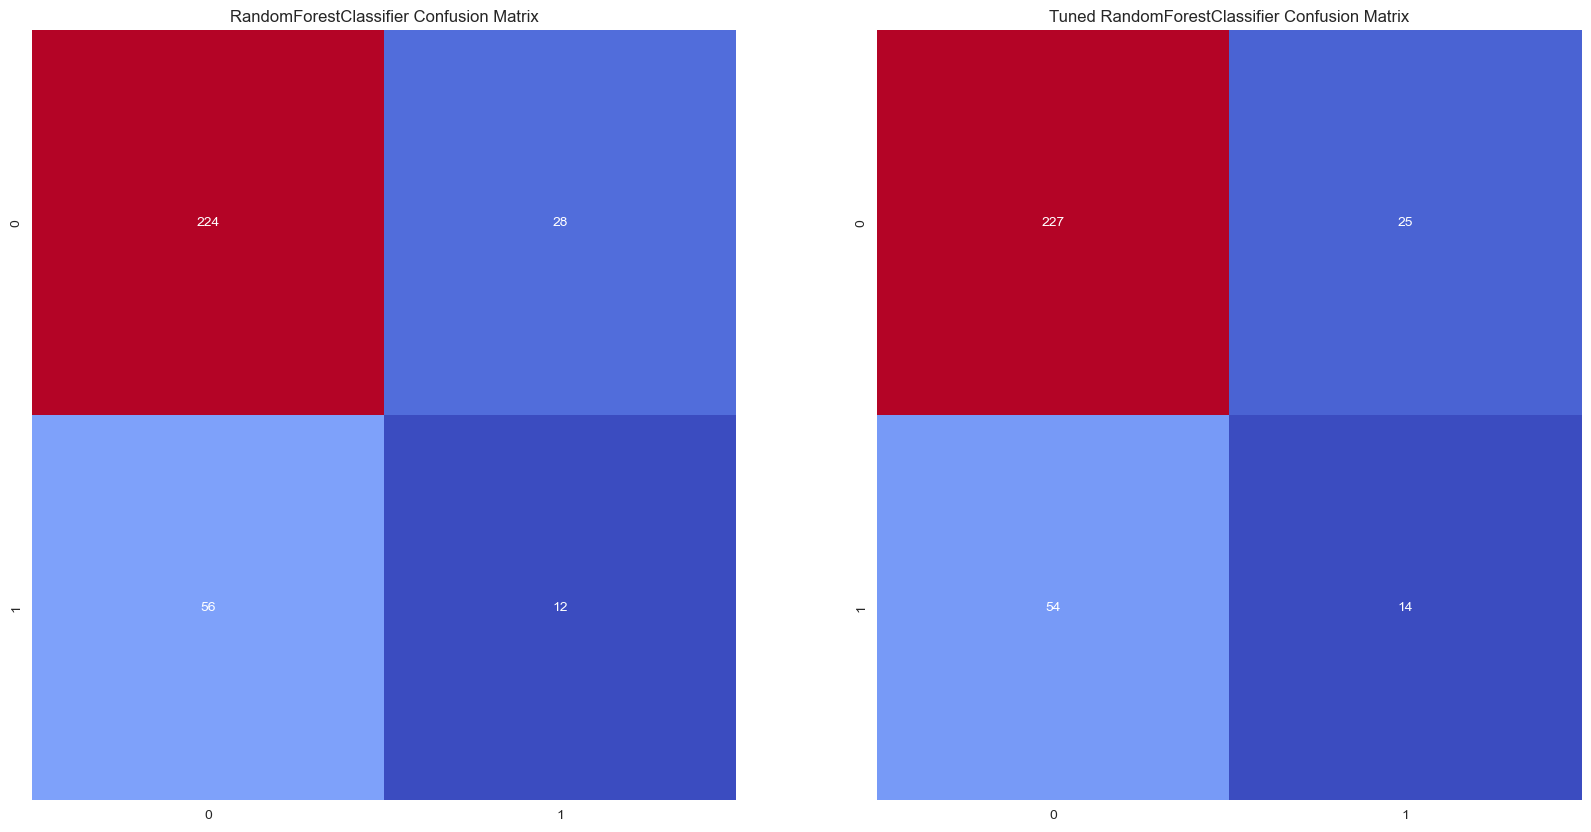

<Figure size 1000x1000 with 0 Axes>

In [490]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_tuned_cm = confusion_matrix(y_test, tuned_rf_y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(rf_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax1)
ax1.set_title("RandomForestClassifier Confusion Matrix")
sns.heatmap(rf_tuned_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax2)
ax2.set_title("Tuned RandomForestClassifier Confusion Matrix")
plt.show()

Both FP and FN have decreased by a little bit, however the minority class is still struggling with predictions, leading us to threshold tuning

Best Threshold: 0.2247 with f1: 0.4178
Recall: 0.6912, Precision: 0.2994


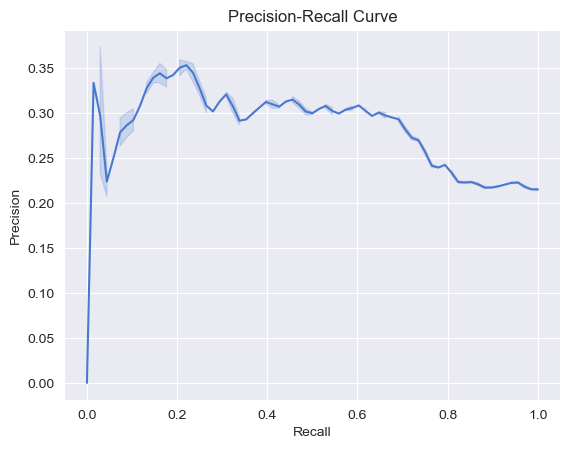

In [505]:
predicted_probabilities = tuned_rf_clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, predicted_probabilities)
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})

f1score = (2 * precision * recall) / (precision + recall + 1e-9)
index = np.argmax(f1score)

opt_threshold = round(thresholds[index], ndigits=4)
opt_f1 = round(f1score[index], ndigits=4)
opt_recall = round(recall[index], ndigits=4)
opt_precision = round(precision[index], ndigits=4)

print(f'Best Threshold: {opt_threshold} with f1: {opt_f1}')
print(f'Recall: {opt_recall}, Precision: {opt_precision}')

sns.lineplot(x='Recall', y='Precision', data=df_recall_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [515]:
final_tuned_rf_clf = (predicted_probabilities > opt_threshold).astype(int)
print(f"Tuned RandomForestClassifier:\n{classification_report(y_test, tuned_rf_y_pred, digits=3)}")
print(f"Tuned RandomForestClassifier with Tuned Threshold:\n{classification_report(y_test, final_tuned_rf_clf, digits=3)}")

Tuned RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.808     0.901     0.852       252
           1      0.359     0.206     0.262        68

    accuracy                          0.753       320
   macro avg      0.583     0.553     0.557       320
weighted avg      0.712     0.753     0.726       320

Tuned RandomForestClassifier with Tuned Threshold:
              precision    recall  f1-score   support

           0      0.866     0.563     0.683       252
           1      0.295     0.676     0.411        68

    accuracy                          0.588       320
   macro avg      0.580     0.620     0.547       320
weighted avg      0.745     0.588     0.625       320



In [607]:
print(f"RandomForestClassifier\ntuned_f1_score: {metrics.f1_score(y_test, tuned_rf_y_pred)}\ntuned_f1_score (with threshold): {metrics.f1_score(y_test, final_tuned_rf_clf)}\ntuned_average_precision: {metrics.average_precision_score(y_test, tuned_rf_y_pred)}\ntuned_average_precision (with tuned threshold): {metrics.average_precision_score(y_test, final_tuned_rf_clf)}")

RandomForestClassifier
tuned_f1_score: 0.26168224299065423
tuned_f1_score (with threshold): 0.4107142857142857
tuned_average_precision: 0.24265648567119158
tuned_average_precision (with tuned threshold): 0.26822209653092005


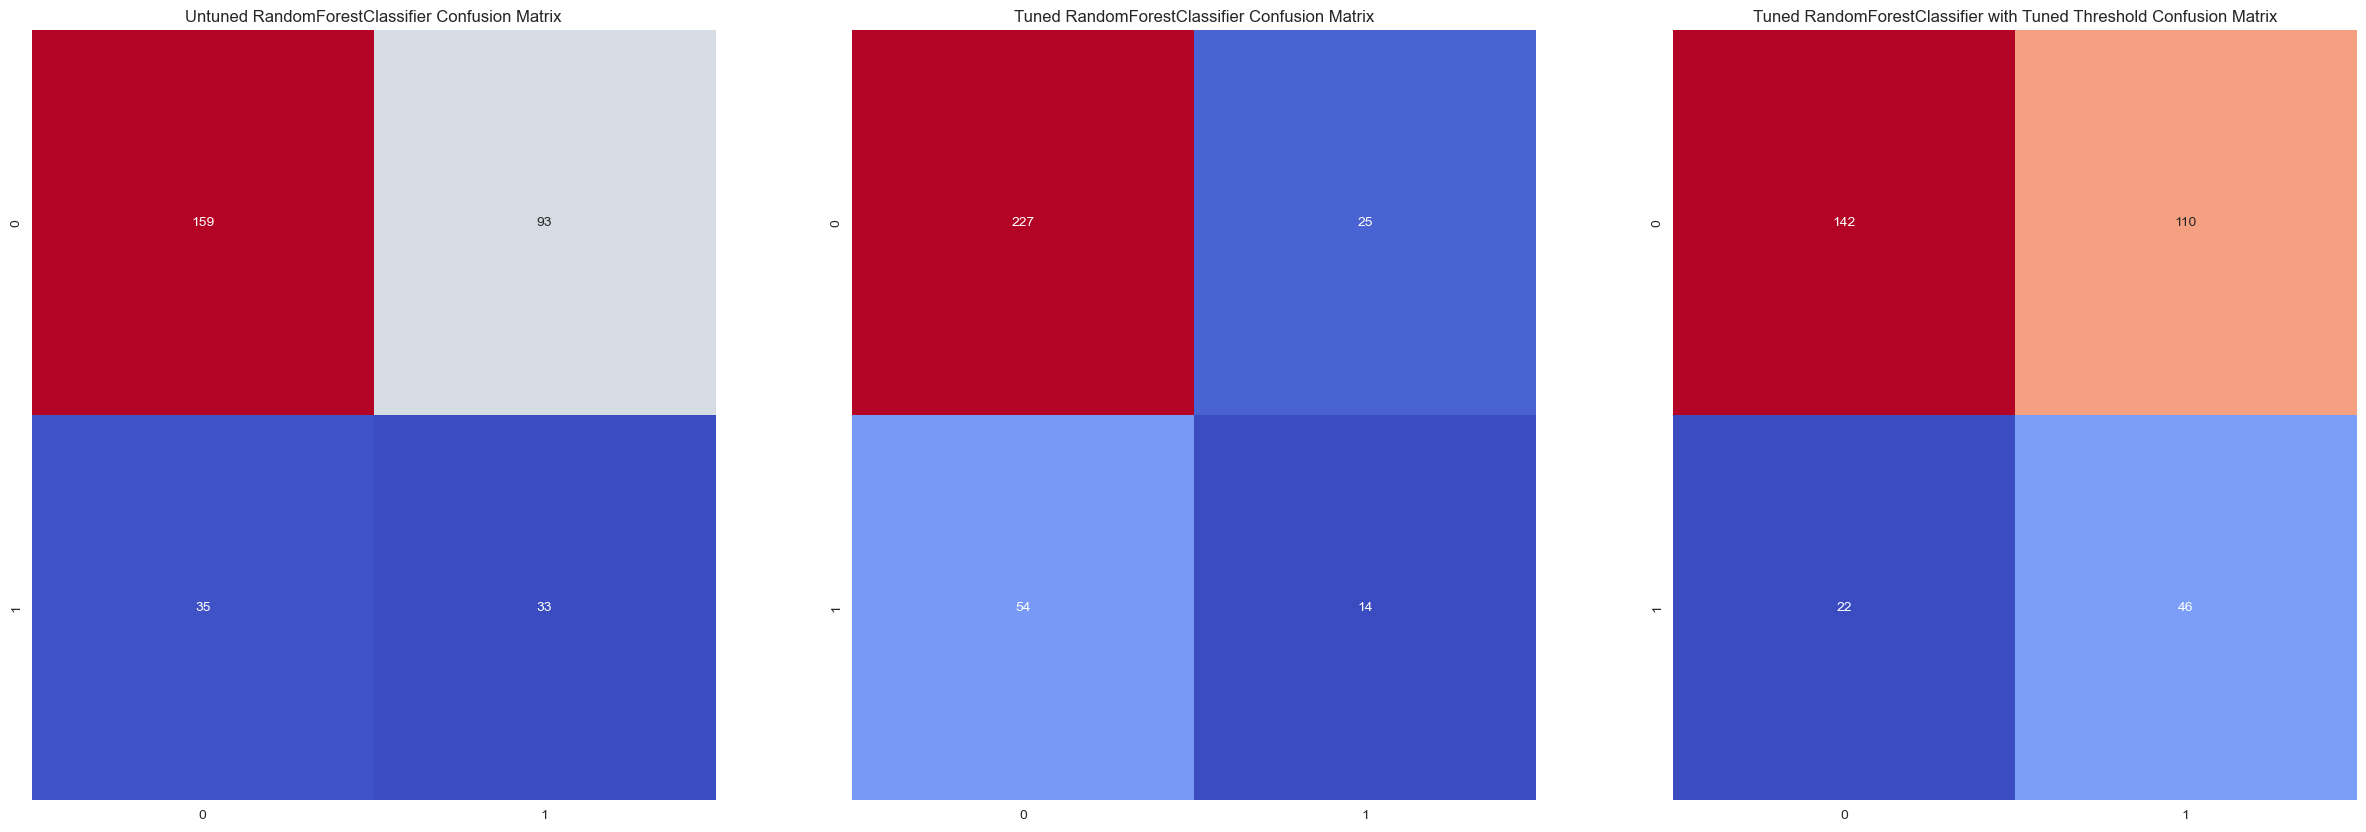

<Figure size 1000x1000 with 0 Axes>

In [517]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
# Confusion Matrix
rf_cm = confusion_matrix(y_test, adb_y_pred)
rf_tuned_cm = confusion_matrix(y_test, tuned_rf_y_pred)
rf_tuned_th_cm = confusion_matrix(y_test, final_tuned_rf_clf)
plt.figure(figsize=(10, 10))
sns.heatmap(rf_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax1)
ax1.set_title("Untuned RandomForestClassifier Confusion Matrix")
sns.heatmap(rf_tuned_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax2)
ax2.set_title("Tuned RandomForestClassifier Confusion Matrix")
sns.heatmap(rf_tuned_th_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax3)
ax3.set_title("Tuned RandomForestClassifier with Tuned Threshold Confusion Matrix")
plt.show()

We can see that now the minority class is able to perform better, but at the expense of the majority class doing worse. However, it is important to remember that in this context, False Negatives are more important and we should minimize that the most.

#### **Hyperparameter Tuning with Gradient Boosting**

In [446]:
list(GradientBoostingClassifier().get_params().keys())

['ccp_alpha',
 'criterion',
 'init',
 'learning_rate',
 'loss',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_iter_no_change',
 'random_state',
 'subsample',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

In [447]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Coarse Tuning with RandomizedSearchCV

In [518]:
parameters_coarse = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.0, 0.1, 0.2, 0.5, 1.0],
    'n_estimators': np.arange(1, 201, 25),
    'criterion': ['friedman_mse', 'squared_error'],
    'max_features': ['sqrt', 'log2'],
    'min_weight_fraction_leaf': [0.0, 0.25, 0.5],
    'min_samples_split': [2, 5, 10],
    'max_depth': np.arange(1, 20, 5),
    'min_samples_leaf': [1, 2, 4],
}
    
# Creating a model based on the pipeline
steps[step_num] = (
    "hyper",
    RandomizedSearchCV(
        GradientBoostingClassifier(),
        parameters_coarse,
        cv=10,
        n_iter=60,
        verbose=1,
        n_jobs=-1,
        scoring="f1"
    ),
)

gb_r_search = Pipeline(steps=steps)
# Fitting Model
gb_r_search.fit(X_train, y_train)

print(gb_r_search.named_steps["hyper"].best_estimator_)
print(gb_r_search.named_steps["hyper"].best_params_)
print(gb_r_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=16, max_features='log2',
                           min_samples_split=10, n_estimators=176)
{'n_estimators': 176, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 16, 'loss': 'log_loss', 'learning_rate': 0.2, 'criterion': 'squared_error'}
0.9571404987198324


In [519]:
{'n_estimators': 176, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 16, 'loss': 'log_loss', 'learning_rate': 0.2, 'criterion': 'squared_error'}

{'n_estimators': 176,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 16,
 'loss': 'log_loss',
 'learning_rate': 0.2,
 'criterion': 'squared_error'}

Fine Tuning with GridSearchCV

In [520]:
n_est_grid = np.arange(gb_r_search.named_steps["hyper"].best_params_['n_estimators'] - 5, gb_r_search.named_steps["hyper"].best_params_['n_estimators'] + 5, 1)
lr_grid = np.arange(gb_r_search.named_steps["hyper"].best_params_['learning_rate'] - 0.2, gb_r_search.named_steps["hyper"].best_params_['learning_rate'] + 0.2, 0.01)
mwf_leaf_grid = np.arange(gb_r_search.named_steps["hyper"].best_params_['min_weight_fraction_leaf'], gb_r_search.named_steps["hyper"].best_params_['min_weight_fraction_leaf'] + 0.01, 0.003)

parameters_fine = {
    'loss': [gb_r_search.named_steps["hyper"].best_params_['loss']],
    'learning_rate': lr_grid,
    'n_estimators': n_est_grid,
    'criterion': [gb_r_search.named_steps["hyper"].best_params_['criterion']],
    'max_features': [gb_r_search.named_steps["hyper"].best_params_['max_features']],
    'min_weight_fraction_leaf': mwf_leaf_grid,
    'min_samples_split': [10],
    'max_depth': [15, 16, 17],
    'min_samples_leaf': [1],
}

# Creating a model based on the pipeline
steps[step_num] = (
    "hyper",
    GridSearchCV(
        GradientBoostingClassifier(),
        parameters_fine,
        cv=10,
        verbose=1,
        n_jobs=-1,
        scoring="f1"
    ),
)

gb_grid_search = Pipeline(steps=steps)
# Fitting Model
gb_grid_search.fit(X_train, y_train)

print(gb_grid_search.named_steps["hyper"].best_estimator_)
print(gb_grid_search.named_steps["hyper"].best_params_)
print(gb_grid_search.named_steps["hyper"].best_score_)

Fitting 10 folds for each of 4800 candidates, totalling 48000 fits
GradientBoostingClassifier(criterion='squared_error', learning_rate=0.21,
                           max_depth=17, max_features='log2',
                           min_samples_split=10, n_estimators=178)
{'criterion': 'squared_error', 'learning_rate': 0.21, 'loss': 'log_loss', 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 178}
0.9623010025745249


In [3]:
{'criterion': 'squared_error', 'learning_rate': 0.21, 'loss': 'log_loss', 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 178}

{'criterion': 'squared_error',
 'learning_rate': 0.21,
 'loss': 'log_loss',
 'max_depth': 17,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 178}

In [583]:
steps[step_num] = (
    "model",
    gb_grid_search.named_steps["hyper"].best_estimator_
)

tuned_gb_clf = Pipeline(steps=steps)
# Fitting Model
tuned_gb_clf.fit(X_train, y_train)
# Creating predictions
tuned_gb_y_pred = tuned_gb_clf.predict(X_test)

In [584]:
print(f"GradientBoostingClassifier:\n{classification_report(y_test, gb_y_pred, digits=3)}")
print(f"Tuned GradientBoostingClassifier:\n{classification_report(y_test, tuned_gb_y_pred, digits=3)}")

GradientBoostingClassifier:
              precision    recall  f1-score   support

           0      0.826     0.698     0.757       252
           1      0.290     0.456     0.354        68

    accuracy                          0.647       320
   macro avg      0.558     0.577     0.556       320
weighted avg      0.712     0.647     0.671       320

Tuned GradientBoostingClassifier:
              precision    recall  f1-score   support

           0      0.798     0.940     0.863       252
           1      0.348     0.118     0.176        68

    accuracy                          0.766       320
   macro avg      0.573     0.529     0.520       320
weighted avg      0.702     0.766     0.717       320



It seems that the hyperparameter tuning greatly increased the model's performance towards the majority class (people who did not default), however this was at the expense of the minority class. This explains the lower f1 and average precision scores.

In [585]:
print(f"GradientBoostingClassifier\nf1_score: {metrics.f1_score(y_test, gb_y_pred)}\ntuned_f1_score: {metrics.f1_score(y_test, tuned_gb_y_pred)}\naverage_precision: {metrics.average_precision_score(y_test, gb_y_pred)}\ntuned_average_precision: {metrics.average_precision_score(y_test, tuned_gb_y_pred)}")

GradientBoostingClassifier
f1_score: 0.35428571428571426
tuned_f1_score: 0.1758241758241758
average_precision: 0.24770306487080812
tuned_average_precision: 0.22842071611253195


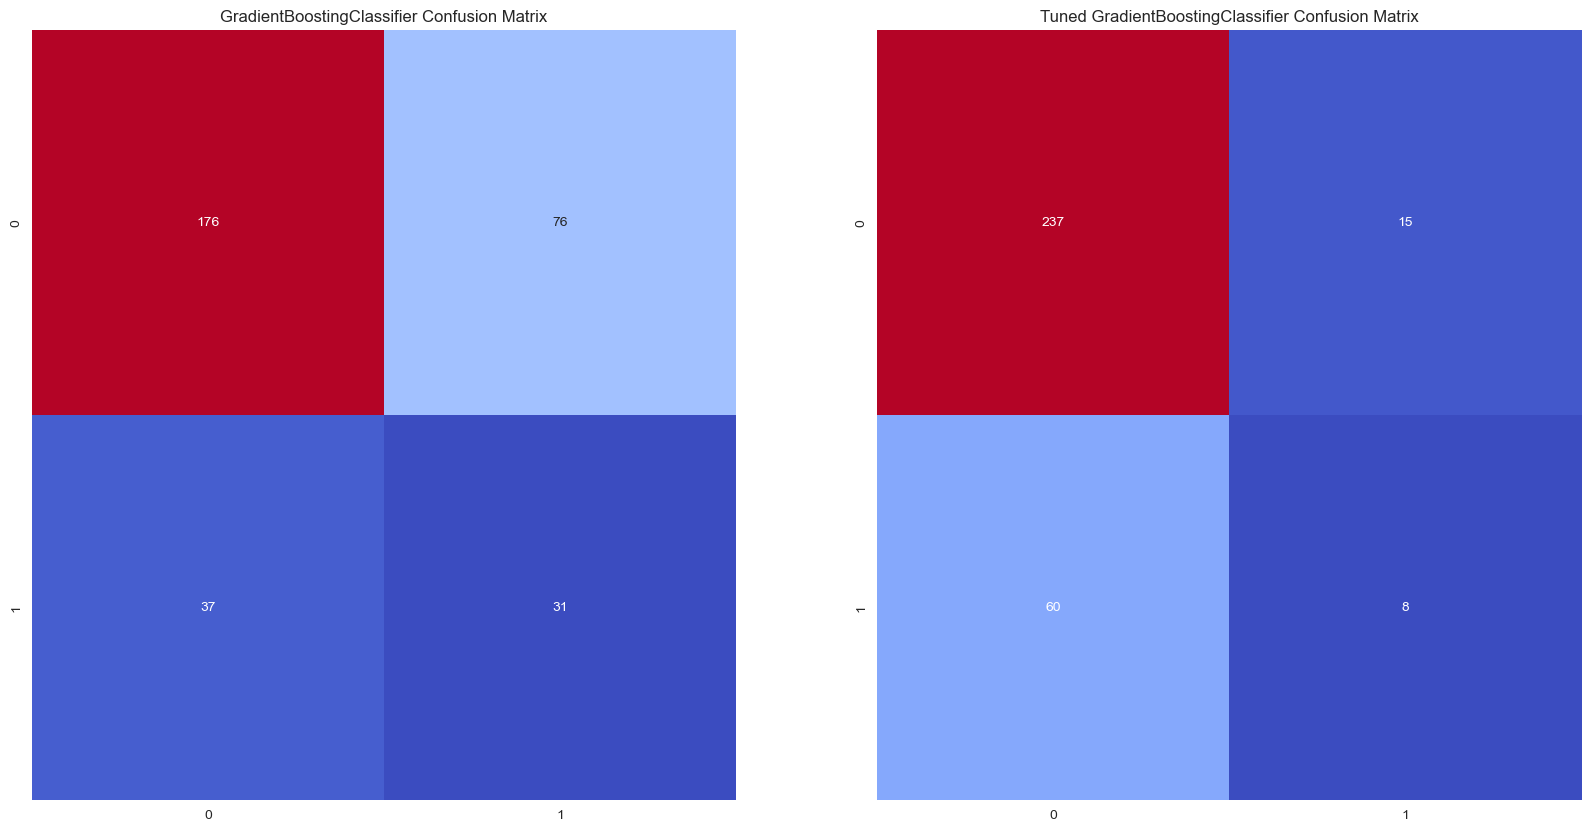

<Figure size 1000x1000 with 0 Axes>

In [587]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# Confusion Matrix
gb_cm = confusion_matrix(y_test, gb_y_pred)
gb_tuned_cm = confusion_matrix(y_test, tuned_gb_y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(gb_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax1)
ax1.set_title("GradientBoostingClassifier Confusion Matrix")
sns.heatmap(gb_tuned_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax2)
ax2.set_title("Tuned GradientBoostingClassifier Confusion Matrix")
plt.show()

We can see that the False Positives have decreased tremendously, while the False Negatives have increased quite a bit. 

As our focus is on decreasing the False Negatives, we will have to move on to threshold tuning.

Best Threshold: 0.0002 with f1: 0.4396
Recall: 0.5882, Precision: 0.3509


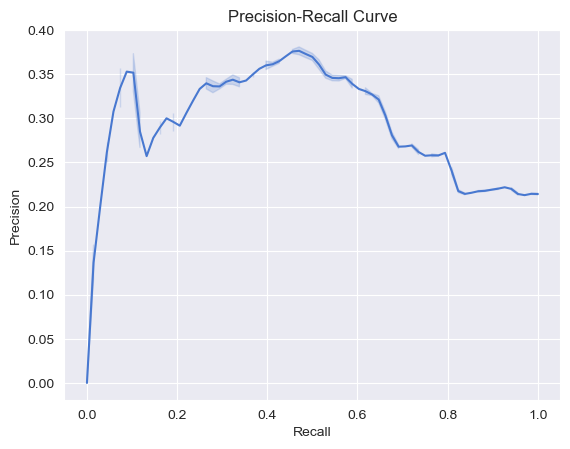

In [588]:
predicted_probabilities = tuned_gb_clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, predicted_probabilities)
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})

f1score = (2 * precision * recall) / (precision + recall + 1e-9)
index = np.argmax(f1score)

opt_threshold = round(thresholds[index], ndigits=4)
opt_f1 = round(f1score[index], ndigits=4)
opt_recall = round(recall[index], ndigits=4)
opt_precision = round(precision[index], ndigits=4)

print(f'Best Threshold: {opt_threshold} with f1: {opt_f1}')
print(f'Recall: {opt_recall}, Precision: {opt_precision}')

sns.lineplot(x='Recall', y='Precision', data=df_recall_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [589]:
final_tuned_gb_clf = (predicted_probabilities > opt_threshold).astype(int)

print(f"Tuned GradientBoostingClassifier:\n{classification_report(y_test, tuned_gb_y_pred, digits=3)}")
print(f"Tuned GradientBoostingClassifier with Tuned Threshold:\n{classification_report(y_test, final_tuned_gb_clf, digits=3)}")

Tuned GradientBoostingClassifier:
              precision    recall  f1-score   support

           0      0.798     0.940     0.863       252
           1      0.348     0.118     0.176        68

    accuracy                          0.766       320
   macro avg      0.573     0.529     0.520       320
weighted avg      0.702     0.766     0.717       320

Tuned GradientBoostingClassifier with Tuned Threshold:
              precision    recall  f1-score   support

           0      0.861     0.710     0.778       252
           1      0.348     0.574     0.433        68

    accuracy                          0.681       320
   macro avg      0.604     0.642     0.606       320
weighted avg      0.752     0.681     0.705       320



In [590]:
print(f"GradientBoostingClassifier\ntuned_f1_score: {metrics.f1_score(y_test, tuned_gb_y_pred)}\ntuned_f1_score (with threshold): {metrics.f1_score(y_test, final_tuned_gb_clf)}\ntuned_average_precision: {metrics.average_precision_score(y_test, tuned_gb_y_pred)}\ntuned_average_precision (with tuned threshold): {metrics.average_precision_score(y_test, final_tuned_gb_clf)}")

GradientBoostingClassifier
tuned_f1_score: 0.1758241758241758
tuned_f1_score (with threshold): 0.43333333333333335
tuned_average_precision: 0.22842071611253195
tuned_average_precision (with tuned threshold): 0.2903361344537815


We can see now that the minority class has improved significantly in f1 score, and the f1 scores and average precision of the model has increased too

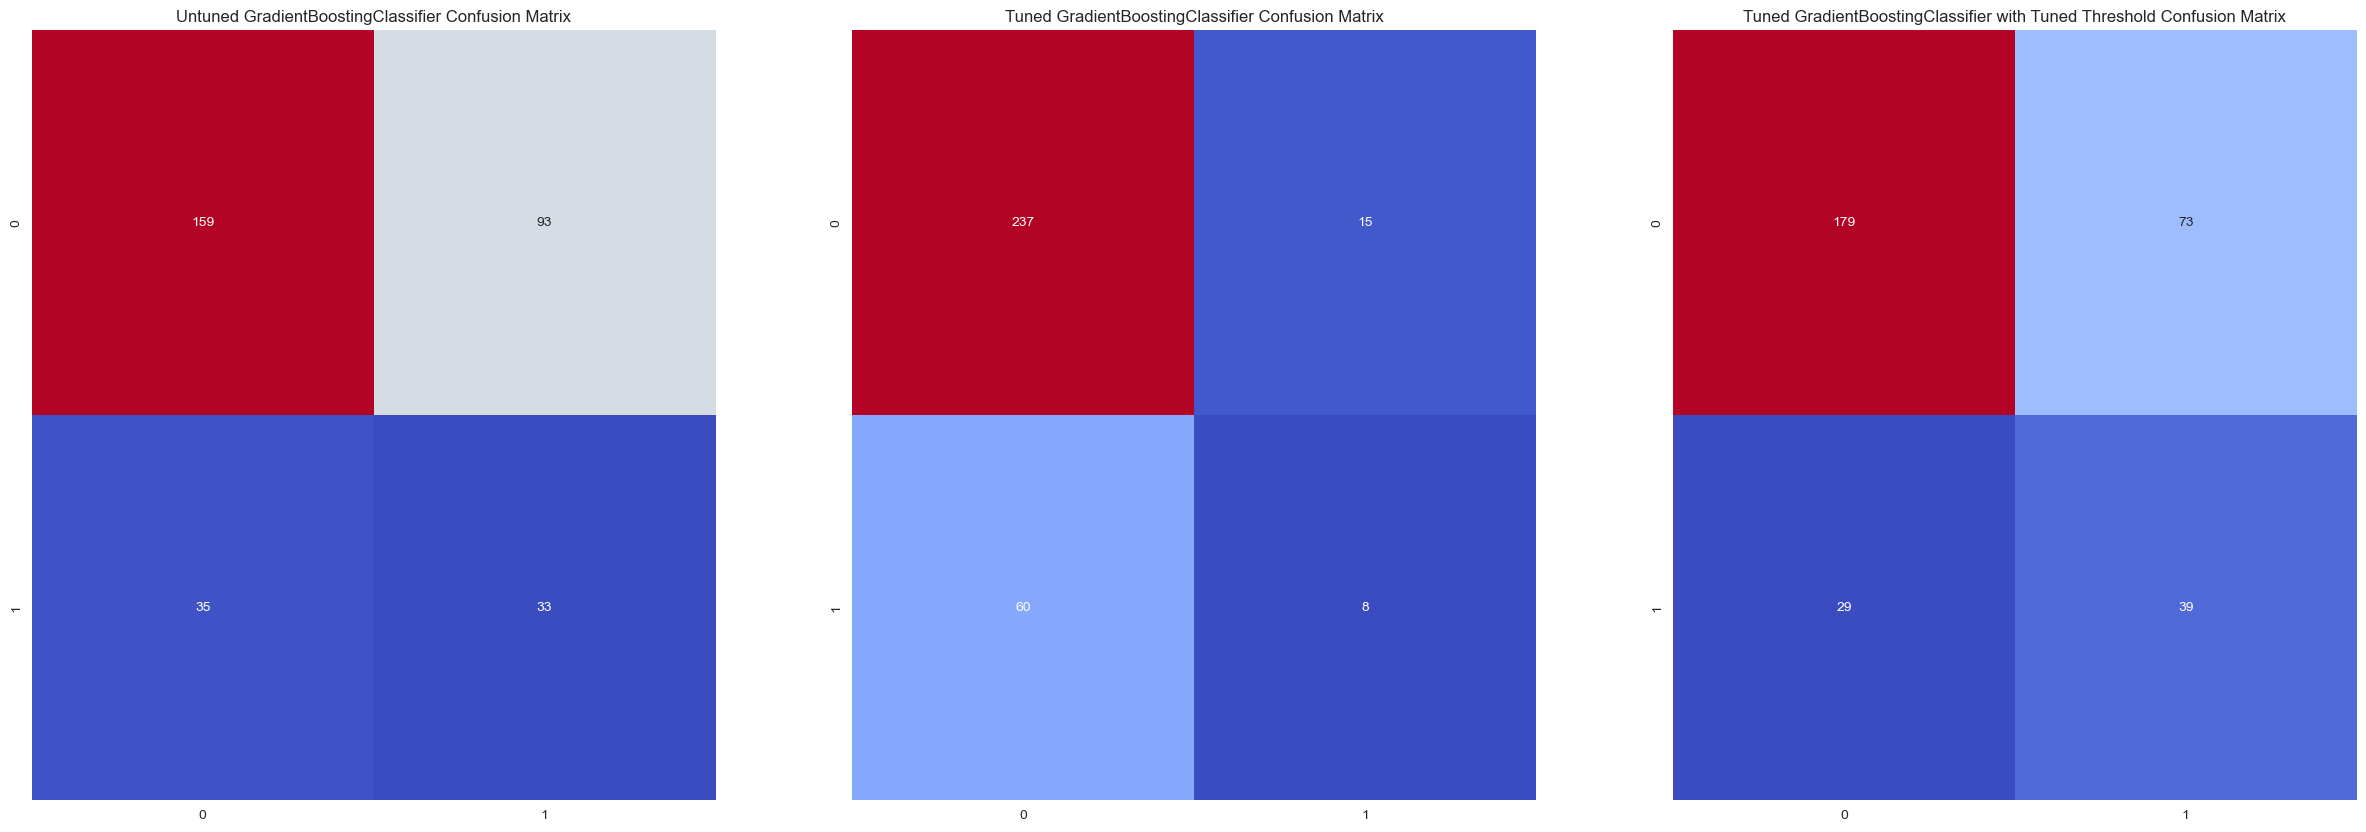

<Figure size 1000x1000 with 0 Axes>

In [591]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
# Confusion Matrix
gb_cm = confusion_matrix(y_test, adb_y_pred)
gb_tuned_cm = confusion_matrix(y_test, tuned_gb_y_pred)
gb_tuned_th_cm = confusion_matrix(y_test, final_tuned_gb_clf)
plt.figure(figsize=(10, 10))
sns.heatmap(gb_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax1)
ax1.set_title("Untuned GradientBoostingClassifier Confusion Matrix")
sns.heatmap(gb_tuned_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax2)
ax2.set_title("Tuned GradientBoostingClassifier Confusion Matrix")
sns.heatmap(gb_tuned_th_cm, annot=True, fmt="", cbar=False, cmap="coolwarm", ax=ax3)
ax3.set_title("Tuned GradientBoostingClassifier with Tuned Threshold Confusion Matrix")
plt.show()

We can see that the False Negatives have decreased, more than the untuned and tuned without tuned threshold

Even though the False Positives did increase, it is still lower than the untuned model and we are focusing on decreasing the number of False Negatives

#### **Feature Importance**

In [596]:
adb_importance = pd.Series(
    tuned_adb_clf[-1].feature_importances_, index=X_scale_train.columns
).sort_values(ascending=False)
print('AdaBoostClassifier Feature Importance:')
adb_importance

AdaBoostClassifier Feature Importance:


Credit_Bill_Ratio      0.144967
Pay_Amount1            0.106499
Bill_Amount1           0.104866
Pay_Amount3            0.090319
Age                    0.087944
Marriage Status        0.081252
Pay_Amount2            0.080136
Bill_Amount3           0.079108
Average_Bill_Amount    0.074593
Bill_Amount2           0.069205
Payment_Delay          0.030474
Credit Limit           0.023186
Gender                 0.015810
Education              0.011642
dtype: float64

In [597]:
rf_importance = pd.Series(
    tuned_rf_clf[-1].feature_importances_, index=X_scale_train.columns
).sort_values(ascending=False)
print('RandomForestClassifier Feature Importance:')
rf_importance

RandomForestClassifier Feature Importance:


Bill_Amount1           0.101736
Pay_Amount1            0.099438
Credit_Bill_Ratio      0.098725
Pay_Amount2            0.096236
Bill_Amount3           0.095790
Average_Bill_Amount    0.088957
Age                    0.088834
Bill_Amount2           0.080711
Pay_Amount3            0.077308
Marriage Status        0.074798
Payment_Delay          0.036337
Credit Limit           0.028344
Gender                 0.018065
Education              0.014721
dtype: float64

In [598]:
gb_importance = pd.Series(
    tuned_gb_clf[-1].feature_importances_, index=X_scale_train.columns
).sort_values(ascending=False)
print('GradientBoostingClassifier Feature Importance:')
gb_importance

GradientBoostingClassifier Feature Importance:


Bill_Amount3           0.118967
Bill_Amount1           0.105542
Pay_Amount1            0.103070
Average_Bill_Amount    0.093790
Credit_Bill_Ratio      0.087947
Age                    0.086761
Bill_Amount2           0.079575
Marriage Status        0.076307
Pay_Amount2            0.073692
Pay_Amount3            0.071059
Payment_Delay          0.040430
Credit Limit           0.031813
Education              0.016049
Gender                 0.014999
dtype: float64

- We see that for all the models, some important features are the credit-bill-ratio, the bill amounts and the paid amounts
- We also see that Education and Gender are of the lowest importance to all the classifiers

This means that our feature engineering did help the model to understand the data better, as Credit_Bill_Ratio was a feature that was added into the data

#### **Conclusion**

We managed to make a machine learning model that can predict if a customer has defaulted payment. We have evaluated many different models on the chosen metrics, chosen 3 models for further tuning to try to improve its performance, especially on the minority class to tackle imbalance in the data.

However, there are still some limitations. Firstly, more data could be used to fit the models for the models to perform better and many other tunings options could be implemented with the help of other libraries like hyperopt and optuna.

- I learnt that the data is really important in terms of machine learning
- One thing I found was challenging for me was the hyperparameter tuning, which led me to research about the models that I was using and find out the parameters to be able to construct a parameter grid suitable for the tuning